# ANÁLISIS DE DATOS EN ESPESORES DE FRAMES DE UNIDAD PINTURA

## 1.- OBJETIVO

### El objetivo principal es identificar oportunidades de mejora del proceso de pintura en compuertas de una empresa a través de un análisis de datos, con ayuda de herramientas Lean Six Sigma. 

### ¿Qué modelo ha tenido espesor alto en algunas de sus caras en el corto plazo?

## 2.- Recopilación de Datos

#### En la unidad de negocio pintura se cuenta con una hoja de registro de espesores en frames (compuertas) en Excel, el cual usaremos para la limpieza y análisis de datos

Importar librerias que vamos a necesitar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

plt.style.use("ggplot")

### Cargar Dataset

Cargar documento de Excel con los espesores por frame

In [2]:
df = pd.read_excel("ESPESOR_FRAME_POR_MES_2023.xlsx", sheet_name = None) #para leer todas las hojas
df = pd.concat(df, ignore_index = True) #juntar todas las hojas en un df

Veamos la importación del data frame

In [3]:
#Los primeros A1, B1, etc... son de cara interna
df

,MODELO,TURNO,N°,DIA,N° DE SERIE,A1,A2,B1,B2,C1,...,B2.1,C1.1,C2.1,D1.1,D2.1,ESPESOR PROMEDIO FRAME.1,LIF,LSF,META,PROMEDIO FRAME
0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MKE10604P20,T2,1.0,2023-01-02,290022.0,3.5,3.2,3.1,2.7,3.1,...,3.9,3.7,3.4,2.5,2.2,2.9625,2.0,4.5,3.6,2.97500
2,NaN,NaN,2.0,2023-01-02,290017.0,2.6,3.7,3.0,3.2,3.4,...,3.8,4.0,3.6,2.5,2.1,3.0750,2.0,4.5,3.6,3.16250
3,NaN,NaN,3.0,2023-01-02,290080.0,2.8,3.7,2.7,2.9,3.5,...,4.0,3.7,3.5,2.4,2.7,3.0750,2.0,4.5,3.6,3.03750
4,NaN,NaN,4.0,2023-01-02,289834.0,2.7,3.1,3.0,2.5,3.9,...,2.6,3.6,3.5,2.6,2.9,2.9000,2.0,4.5,3.6,2.98750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,NaN,NaN,3.0,2023-11-07,328794.0,3.3,4.6,4.0,3.3,3.6,...,3.0,3.1,3.2,3.1,3.1,3.2125,2.0,4.5,3.6,3.48125
2871,NaN,NaN,4.0,2023-11-07,328813.0,2.9,3.7,3.5,3.2,3.0,...,4.0,3.1,3.0,2.5,2.5,3.2250,2.0,4.5,3.6,3.33125
2872,NaN,NaN,5.0,2023-11-07,328826.0,3.1,5.0,3.8,4.6,3.7,...,3.6,2.6,3.5,3.6,3.6,3.4000,2.0,4.5,3.6,3.78750
2873,NaN,NaN,6.0,2023-11-07,328822.0,3.4,4.8,4.0,4.2,4.1,...,3.6,3.1,2.6,2.5,2.5,3.0625,2.0,4.5,3.6,3.62500


## 3.- Exploración Inicial de Datos

### Empecemos por ver las características del dataframe antes de limpiar

Veamos las primeras 20 filas del dataframe.

In [4]:
df.head(20)

,MODELO,TURNO,N°,DIA,N° DE SERIE,A1,A2,B1,B2,C1,...,B2.1,C1.1,C2.1,D1.1,D2.1,ESPESOR PROMEDIO FRAME.1,LIF,LSF,META,PROMEDIO FRAME
0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MKE10604P20,T2,1.0,2023-01-02,290022.0,3.5,3.2,3.1,2.7,3.1,...,3.9,3.7,3.4,2.5,2.2,2.9625,2.0,4.5,3.6,2.97500
2,NaN,NaN,2.0,2023-01-02,290017.0,2.6,3.7,3.0,3.2,3.4,...,3.8,4.0,3.6,2.5,2.1,3.0750,2.0,4.5,3.6,3.16250
3,NaN,NaN,3.0,2023-01-02,290080.0,2.8,3.7,2.7,2.9,3.5,...,4.0,3.7,3.5,2.4,2.7,3.0750,2.0,4.5,3.6,3.03750
4,NaN,NaN,4.0,2023-01-02,289834.0,2.7,3.1,3.0,2.5,3.9,...,2.6,3.6,3.5,2.6,2.9,2.9000,2.0,4.5,3.6,2.98750
5,NaN,NaN,5.0,2023-01-02,290032.0,2.3,3.3,2.8,2.6,3.8,...,3.9,3.8,3.6,3.1,2.2,3.1625,2.0,4.5,3.6,3.11250
6,NaN,NaN,6.0,2023-01-02,290031.0,3.6,3.5,2.4,3.0,3.6,...,3.7,3.8,3.6,2.0,2.1,2.9750,2.0,4.5,3.6,3.08125
7,NaN,NaN,7.0,2023-01-02,290010.0,3.4,3.6,2.6,2.5,3.5,...,4.0,3.7,3.2,2.2,2.2,2.9125,2.0,4.5,3.6,3.02500
8,MKE10604P4,T3,1.0,2023-01-03,289440.0,3.7,4.4,3.8,4.2,4.1,...,2.0,2.7,2.1,2.6,3.6,2.7250,2.0,4.5,3.6,3.35625
9,NaN,NaN,2.0,2023-01-03,289431.0,3.6,3.4,4.3,4.3,4.0,...,2.1,2.8,2.3,3.3,3.1,2.7750,2.0,4.5,3.6,3.33750


In [5]:
df.columns

Index(['MODELO', 'TURNO', 'N°', 'DIA', 'N° DE SERIE', 'A1', 'A2', 'B1', 'B2',
       'C1', 'C2', 'D1', 'D2', 'ESPESOR PROMEDIO FRAME', 'N° DE SERIE.1',
       'A1.1', 'A2.1', 'B1.1', 'B2.1', 'C1.1', 'C2.1', 'D1.1', 'D2.1',
       'ESPESOR PROMEDIO FRAME.1', 'LIF', 'LSF', 'META', 'PROMEDIO FRAME'],
      dtype='object')

Se pueden observar valores NaN en columna MODELO y Nº, ademas de una fila completamente nula al inicio. Además de más valores nulos en las últimas filas. Además de poder renombrar columnas para una mejor interpretación del dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2875 entries, 0 to 2874
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   MODELO                    399 non-null    object        
 1   TURNO                     407 non-null    object        
 2   N°                        2863 non-null   float64       
 3   DIA                       2863 non-null   datetime64[ns]
 4   N° DE SERIE               2416 non-null   float64       
 5   A1                        2784 non-null   float64       
 6   A2                        2784 non-null   float64       
 7   B1                        2784 non-null   float64       
 8   B2                        2784 non-null   float64       
 9   C1                        2784 non-null   float64       
 10  C2                        2784 non-null   float64       
 11  D1                        2784 non-null   float64       
 12  D2                  

Se observa que hay varios valores nulos en las diferentes columnas del dataframe, será importante analizar que columnas podemos eliminar y que valores podemos rellenar y/o eliminar.

In [7]:
df.dtypes

MODELO                              object
TURNO                               object
N°                                 float64
DIA                         datetime64[ns]
N° DE SERIE                        float64
A1                                 float64
A2                                 float64
B1                                 float64
B2                                 float64
C1                                 float64
C2                                 float64
D1                                 float64
D2                                 float64
ESPESOR PROMEDIO FRAME             float64
N° DE SERIE.1                      float64
A1.1                               float64
A2.1                                object
B1.1                               float64
B2.1                               float64
C1.1                               float64
C2.1                               float64
D1.1                               float64
D2.1                               float64
ESPESOR PRO

En cuanto a los data types, todo parece ir normal a exepción de la columna A2.1, donde también debería ser de tipo float64. Necesitaremos analizar si hay algunos valores string o mal escritos.

En la columna Nº debería ser tipo entero, pero veremos más adelante que es una columna que se puede despreciar.

In [8]:
df.describe()

,N°,N° DE SERIE,A1,A2,B1,B2,C1,C2,D1,D2,...,B2.1,C1.1,C2.1,D1.1,D2.1,ESPESOR PROMEDIO FRAME.1,LIF,LSF,META,PROMEDIO FRAME
count,2863.000000,2.416000e+03,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2715.000000,...,2783.000000,2783.000000,2783.000000,2783.000000,2782.000000,2783.000000,2863.000000,2863.0,2.863000e+03,2783.000000
mean,4.000349,3.114980e+05,2.836182,3.397040,2.866106,2.938251,3.355686,3.037116,3.375801,3.199190,...,3.339935,3.328782,3.325595,3.129968,3.182728,3.279611,2.000524,4.5,3.600000e+00,3.410503
std,1.999913,8.848669e+04,1.211243,1.485181,1.222017,1.248459,1.437535,1.272493,1.476255,1.437261,...,0.703670,0.668874,0.644362,0.611371,0.590035,0.414917,0.028034,0.0,1.936567e-13,0.383517
min,1.000000,2.177000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.5,3.600000e+00,0.000000
25%,2.000000,2.998362e+05,2.600000,3.000000,2.675000,2.700000,3.100000,2.900000,3.000000,2.800000,...,2.900000,2.900000,2.900000,2.700000,2.800000,3.025000,2.000000,4.5,3.600000e+00,3.181250
50%,4.000000,3.089805e+05,3.100000,3.700000,3.100000,3.200000,3.700000,3.400000,3.700000,3.500000,...,3.300000,3.300000,3.300000,3.100000,3.200000,3.250000,2.000000,4.5,3.600000e+00,3.406250
75%,6.000000,3.202930e+05,3.600000,4.300000,3.600000,3.700000,4.200000,3.800000,4.300000,4.000000,...,3.800000,3.700000,3.700000,3.500000,3.600000,3.500000,2.000000,4.5,3.600000e+00,3.631250
max,7.000000,3.601165e+06,5.500000,6.700000,5.900000,5.700000,6.600000,5.600000,7.000000,29.000000,...,8.400000,6.400000,6.200000,5.300000,6.000000,5.525000,3.500000,4.5,3.600000e+00,4.806250


En cuanto a un primer vistazo de los estadísticos del dataframe, hay algunos valores extraños que se tienen que limpiar. Tales como N° DE SERIE y Nº. Además de columnas repetitivas como LIF, LSF, META.

En D2 hay un valor maximo de 29 lo cual no es posible, tal vez quiso decir 2.9

## 4.- Limpieza de Datos 

### Una vez explorado el dataset, nos encargaremos de la limpieza de los datos.

Eliminar las columnas que creemos no necesitamos, tales como:

    *Nº DE SERIE y Nº
    *LSF, LFI y META

In [9]:
#Eliminar el numero de pieza (siempre son 7 por frames por modelo)
df = df.drop(["N° DE SERIE", "N° DE SERIE.1", "N°", "META", "LIF", "LSF"], axis = 1)

Se pueden rellenar los espacios vacios en la columna de modelo y turno ya que por cada registro (modelo) son 7 filas para adelante con los mismos datos de TURNO y MODELO.

Se revisó previamente el dataset para verificar que los registros que son nulos no contienen información importante, por lo tanto se eliminaran todas las filas que contengan valores NaN.

In [10]:
#Rellenar espacios en blanco de modelos hacia abajo (siempre son 7 por modelo de frame)
df["MODELO"].fillna(method = "ffill", inplace = True)
df["TURNO"].fillna(method = "ffill", inplace = True) #De igual manera que con la columna MODELO
df.dropna(inplace = True) #eliminar las filas con valores NAN

#Aqui se podria agregar 0 a las columnas del modelo MKE10943 de la cara interna, algunos son 0 y otros NaN
columnas_a_rellenar = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2', 'D1', 'D2', 'PROM CI']
modelo_a_rellenar = "MKE10943" #se debe de hacer una vez limpiados los modelos
df.loc[df['MODELO'] == modelo_a_rellenar, columnas_a_rellenar] = 0

In [11]:
df

,MODELO,TURNO,DIA,A1,A2,B1,B2,C1,C2,D1,...,A1.1,A2.1,B1.1,B2.1,C1.1,C2.1,D1.1,D2.1,ESPESOR PROMEDIO FRAME.1,PROMEDIO FRAME
1,MKE10604P20,T2,2023-01-02,3.5,3.2,3.1,2.7,3.1,3.4,2.5,...,2.2,2.3,3.5,3.9,3.7,3.4,2.5,2.2,2.9625,2.97500
2,MKE10604P20,T2,2023-01-02,2.6,3.7,3.0,3.2,3.4,3.9,3.3,...,2.6,2.8,3.2,3.8,4.0,3.6,2.5,2.1,3.0750,3.16250
3,MKE10604P20,T2,2023-01-02,2.8,3.7,2.7,2.9,3.5,2.8,3.1,...,2.6,2.8,2.9,4.0,3.7,3.5,2.4,2.7,3.0750,3.03750
4,MKE10604P20,T2,2023-01-02,2.7,3.1,3.0,2.5,3.9,3.7,3.0,...,2.7,2.7,2.6,2.6,3.6,3.5,2.6,2.9,2.9000,2.98750
5,MKE10604P20,T2,2023-01-02,2.3,3.3,2.8,2.6,3.8,3.6,3.1,...,2.4,3.1,3.2,3.9,3.8,3.6,3.1,2.2,3.1625,3.11250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,MKE10200P20,T2,2023-11-07,3.3,4.6,4.0,3.3,3.6,3.2,4.2,...,3.0,3.7,3.5,3.0,3.1,3.2,3.1,3.1,3.2125,3.48125
2871,MKE10200P20,T2,2023-11-07,2.9,3.7,3.5,3.2,3.0,3.1,5.0,...,3.4,4.1,3.2,4.0,3.1,3.0,2.5,2.5,3.2250,3.33125
2872,MKE10200P20,T2,2023-11-07,3.1,5.0,3.8,4.6,3.7,3.6,5.0,...,2.6,4.0,3.7,3.6,2.6,3.5,3.6,3.6,3.4000,3.78750
2873,MKE10200P20,T2,2023-11-07,3.4,4.8,4.0,4.2,4.1,3.5,5.0,...,2.7,3.9,3.6,3.6,3.1,2.6,2.5,2.5,3.0625,3.62500


Reenombrar las columnas de promedios.

In [12]:
df.columns #todas las columnas que tenemos

Index(['MODELO', 'TURNO', 'DIA', 'A1', 'A2', 'B1', 'B2', 'C1', 'C2', 'D1',
       'D2', 'ESPESOR PROMEDIO FRAME', 'A1.1', 'A2.1', 'B1.1', 'B2.1', 'C1.1',
       'C2.1', 'D1.1', 'D2.1', 'ESPESOR PROMEDIO FRAME.1', 'PROMEDIO FRAME'],
      dtype='object')

In [13]:
#Renombrar algunas columnas
#CI: Cara Interna, CE: Cara Externa
df.rename(columns = {"ESPESOR PROMEDIO FRAME":"PROM CI", 
                     "ESPESOR PROMEDIO FRAME.1":"PROM CE",
                     "PROMEDIO FRAME":"PROM FRAME"}, inplace = True)

In [14]:
df

,MODELO,TURNO,DIA,A1,A2,B1,B2,C1,C2,D1,...,A1.1,A2.1,B1.1,B2.1,C1.1,C2.1,D1.1,D2.1,PROM CE,PROM FRAME
1,MKE10604P20,T2,2023-01-02,3.5,3.2,3.1,2.7,3.1,3.4,2.5,...,2.2,2.3,3.5,3.9,3.7,3.4,2.5,2.2,2.9625,2.97500
2,MKE10604P20,T2,2023-01-02,2.6,3.7,3.0,3.2,3.4,3.9,3.3,...,2.6,2.8,3.2,3.8,4.0,3.6,2.5,2.1,3.0750,3.16250
3,MKE10604P20,T2,2023-01-02,2.8,3.7,2.7,2.9,3.5,2.8,3.1,...,2.6,2.8,2.9,4.0,3.7,3.5,2.4,2.7,3.0750,3.03750
4,MKE10604P20,T2,2023-01-02,2.7,3.1,3.0,2.5,3.9,3.7,3.0,...,2.7,2.7,2.6,2.6,3.6,3.5,2.6,2.9,2.9000,2.98750
5,MKE10604P20,T2,2023-01-02,2.3,3.3,2.8,2.6,3.8,3.6,3.1,...,2.4,3.1,3.2,3.9,3.8,3.6,3.1,2.2,3.1625,3.11250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,MKE10200P20,T2,2023-11-07,3.3,4.6,4.0,3.3,3.6,3.2,4.2,...,3.0,3.7,3.5,3.0,3.1,3.2,3.1,3.1,3.2125,3.48125
2871,MKE10200P20,T2,2023-11-07,2.9,3.7,3.5,3.2,3.0,3.1,5.0,...,3.4,4.1,3.2,4.0,3.1,3.0,2.5,2.5,3.2250,3.33125
2872,MKE10200P20,T2,2023-11-07,3.1,5.0,3.8,4.6,3.7,3.6,5.0,...,2.6,4.0,3.7,3.6,2.6,3.5,3.6,3.6,3.4000,3.78750
2873,MKE10200P20,T2,2023-11-07,3.4,4.8,4.0,4.2,4.1,3.5,5.0,...,2.7,3.9,3.6,3.6,3.1,2.6,2.5,2.5,3.0625,3.62500


Observemos todos los valores únicos en la columna MODELO y ver si es necesario limpiarlos.

In [15]:
#ver todos los modelos
df["MODELO"].unique()

array(['MKE10604P20', 'MKE10604P4', 'MKE10576P4', 'MKE10604',
       'MKE10943P2', 'MKE10200P4', 'MKE10943', 'MKE10514P4',
       'NO SE CORRE LINEA', 'MKE10513P4', 'MKE10611P20', 'MKE10450',
       'MKE10201', 'MKE106044', 'MKE10201P4', 'MKE10604WP4', 'MKE10611P4',
       'MKE109643P2', 'MKE10200P20', 'MKE 10611P20', 'MKE 10611',
       'MKE10611', 'MKE10200', 'MKE 10611 P20', 'MKE10943 P2', 'MKE10513',
       'MKE10611 P20', 'MKE10604 P4', 'MKE 10604 ', 'MKE10604  P4',
       'MKE10604 ', 'MKE1010200', 'MKE10513 P4', 'MKE10201 P4',
       'MKE10611 P4', 'MKE10200 P4', 'MKE10514', 'MKE10514 P4',
       'MKE10181', 'MKE10576', 'MKE10588', 'MKE10200WP20', 'MKE10588P4',
       'MKE10588 P4\nVITROCOAT', 'MKE10200\nVITROCOAT',
       'MKE10200WP20\nVITROCOAT', 'MKE10201\nVITROCOAT',
       'MKE10604P4\nVITROCOAT', 'MKE10588 P4', 'MKE 10588', 'MKE 10588P4'],
      dtype=object)

In [16]:
#quitar espacios en blanco de los modelos
df["MODELO"] = df["MODELO"].str.replace(" ", "")

In [17]:
#eliminar los clasificdores P20,P4,P2, WP4
df["MODELO"] = df["MODELO"].str.replace(r"P20|P4|P2|WP4", "",regex = True)

In [18]:
df["MODELO"].unique() #Modelos unicos

array(['MKE10604', 'MKE10576', 'MKE10943', 'MKE10200', 'MKE10514',
       'NOSECORRELINEA', 'MKE10513', 'MKE10611', 'MKE10450', 'MKE10201',
       'MKE106044', 'MKE109643', 'MKE1010200', 'MKE10181', 'MKE10588',
       'MKE10200W', 'MKE10588\nVITROCOAT', 'MKE10200\nVITROCOAT',
       'MKE10200W\nVITROCOAT', 'MKE10201\nVITROCOAT',
       'MKE10604\nVITROCOAT'], dtype=object)

Nótese que hay algunos modelos mal escritos, por lo que los reemplazaremos de la siguiente manera:

In [19]:
df["MODELO"] = df["MODELO"].replace({"MKE106044":"MKE10604", "MKE1010200": "MKE10200",
                                     "MKE109643":"MKE10943", "MKE10588\nVITROCOAT":"MKE10588",
                                    "MKE10200\nVITROCOAT": "MKE10200","MKE10200W\nVITROCOAT":"MKE10200W",
                                    'MKE10201\nVITROCOAT':'MKE10201', 'MKE10604\nVITROCOAT':'MKE10604'})

In [20]:
#Quedarnos con el dataframe que no contenga "NOSECORRELINEA" en columna MODELO
df = df[~df["MODELO"].str.contains("NOSECORRELINEA")]

In [21]:
df["MODELO"].unique()

array(['MKE10604', 'MKE10576', 'MKE10943', 'MKE10200', 'MKE10514',
       'MKE10513', 'MKE10611', 'MKE10450', 'MKE10201', 'MKE10181',
       'MKE10588', 'MKE10200W'], dtype=object)

Finalmente tenemos limpia la columna MODELO.

Localizar valores str en la columna A2.1 y reemplazarlos por numeros:

In [22]:
string = [] #creando lista con todos los valores que no son float

#para cada elemento de la columna...
for i in df["A2.1"]: 
    
    if type(i) == str: #si el elemento es string, agregarlo a la lista
        indices = df.index[df["A2.1"] == i].tolist()
        #print(indices)
        string.append(i)
    else:
        pass
       
print(string)

['.3.9', '3..4']


Verificar si en la columna D2 no hay otros valores altos aparte de 29.0

In [23]:
value = []
for i in df["D2"]:
    if i > 7:
        indices = df.index[["D2"] == i].tolist()
        value.append(i)
    else:
        pass
print(value)

for i in df["A1.1"]:
    if i > 7:
        indices = df.index[["A1.1"] == i].tolist()
        value.append(i)
    else:
        pass
print(value)

[29.0]
[29.0, 20.0]


/var/folders/_d/34b5thn90fj_93zjmbzv253c0000gn/T/ipykernel_20826/3028644766.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  indices = df.index[["D2"] == i].tolist()
/var/folders/_d/34b5thn90fj_93zjmbzv253c0000gn/T/ipykernel_20826/3028644766.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  indices = df.index[["A1.1"] == i].tolist()


Reemplazar valores

In [24]:
df["A2.1"] = df["A2.1"].replace(".3.9", float(3.9)) #es mejor reemplazar usando columnas y filas
df["A2.1"] = df["A2.1"].replace("3..4", float(3.4)) #es mejor reemplazar usando columnas y filas
df["D2"] = df["D2"].replace(29.0, float(2.9))
df["A1.1"] = df["A1.1"].replace(20.0, float(2.0))

/var/folders/_d/34b5thn90fj_93zjmbzv253c0000gn/T/ipykernel_20826/338457494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["A2.1"] = df["A2.1"].replace(".3.9", float(3.9)) #es mejor reemplazar usando columnas y filas
/var/folders/_d/34b5thn90fj_93zjmbzv253c0000gn/T/ipykernel_20826/338457494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["A2.1"] = df["A2.1"].replace("3..4", float(3.4)) #es mejor reemplazar usando columnas y filas
/var/folders/_d/34b5thn90fj_93zjmbzv253c0000gn/T/ipykernel_20826

In [25]:
df.describe()

,A1,A2,B1,B2,C1,C2,D1,D2,PROM CI,A1.1,A2.1,B1.1,B2.1,C1.1,C2.1,D1.1,D2.1,PROM CE,PROM FRAME
count,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000
mean,2.880092,3.447435,2.903008,2.982960,3.409361,3.083455,3.434683,3.198707,3.168668,3.227975,3.364671,3.354372,3.341774,3.328418,3.323551,3.130710,3.185643,3.282370,3.414669
std,1.163768,1.428647,1.166477,1.198186,1.382105,1.219493,1.425118,1.340158,1.189442,0.594706,0.636993,0.685680,0.682325,0.647499,0.622168,0.590472,0.569351,0.380419,0.342584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000,1.200000,1.100000,0.500000,0.600000,0.800000,0.400000,0.200000,1.662500,2.062500
25%,2.600000,3.000000,2.700000,2.700000,3.100000,2.900000,3.100000,2.800000,3.137500,2.800000,2.900000,2.900000,2.900000,2.900000,2.900000,2.700000,2.800000,3.025000,3.181250
50%,3.100000,3.800000,3.100000,3.200000,3.700000,3.400000,3.700000,3.500000,3.500000,3.200000,3.300000,3.300000,3.300000,3.300000,3.300000,3.100000,3.200000,3.250000,3.406250
75%,3.600000,4.300000,3.600000,3.700000,4.200000,3.800000,4.300000,4.000000,3.800000,3.600000,3.800000,3.800000,3.700000,3.700000,3.700000,3.500000,3.600000,3.500000,3.625000
max,5.500000,6.700000,5.900000,5.700000,6.600000,5.600000,7.000000,6.800000,6.312500,5.800000,6.200000,7.000000,8.400000,6.400000,6.200000,5.300000,6.000000,5.525000,4.806250


In [26]:
df.dtypes

MODELO                object
TURNO                 object
DIA           datetime64[ns]
A1                   float64
A2                   float64
B1                   float64
B2                   float64
C1                   float64
C2                   float64
D1                   float64
D2                   float64
PROM CI              float64
A1.1                 float64
A2.1                 float64
B1.1                 float64
B2.1                 float64
C1.1                 float64
C2.1                 float64
D1.1                 float64
D2.1                 float64
PROM CE              float64
PROM FRAME           float64
dtype: object

Finalmente tenemos valores flotantes en columna A2.1

In [27]:
df

,MODELO,TURNO,DIA,A1,A2,B1,B2,C1,C2,D1,...,A1.1,A2.1,B1.1,B2.1,C1.1,C2.1,D1.1,D2.1,PROM CE,PROM FRAME
1,MKE10604,T2,2023-01-02,3.5,3.2,3.1,2.7,3.1,3.4,2.5,...,2.2,2.3,3.5,3.9,3.7,3.4,2.5,2.2,2.9625,2.97500
2,MKE10604,T2,2023-01-02,2.6,3.7,3.0,3.2,3.4,3.9,3.3,...,2.6,2.8,3.2,3.8,4.0,3.6,2.5,2.1,3.0750,3.16250
3,MKE10604,T2,2023-01-02,2.8,3.7,2.7,2.9,3.5,2.8,3.1,...,2.6,2.8,2.9,4.0,3.7,3.5,2.4,2.7,3.0750,3.03750
4,MKE10604,T2,2023-01-02,2.7,3.1,3.0,2.5,3.9,3.7,3.0,...,2.7,2.7,2.6,2.6,3.6,3.5,2.6,2.9,2.9000,2.98750
5,MKE10604,T2,2023-01-02,2.3,3.3,2.8,2.6,3.8,3.6,3.1,...,2.4,3.1,3.2,3.9,3.8,3.6,3.1,2.2,3.1625,3.11250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,MKE10200,T2,2023-11-07,3.3,4.6,4.0,3.3,3.6,3.2,4.2,...,3.0,3.7,3.5,3.0,3.1,3.2,3.1,3.1,3.2125,3.48125
2871,MKE10200,T2,2023-11-07,2.9,3.7,3.5,3.2,3.0,3.1,5.0,...,3.4,4.1,3.2,4.0,3.1,3.0,2.5,2.5,3.2250,3.33125
2872,MKE10200,T2,2023-11-07,3.1,5.0,3.8,4.6,3.7,3.6,5.0,...,2.6,4.0,3.7,3.6,2.6,3.5,3.6,3.6,3.4000,3.78750
2873,MKE10200,T2,2023-11-07,3.4,4.8,4.0,4.2,4.1,3.5,5.0,...,2.7,3.9,3.6,3.6,3.1,2.6,2.5,2.5,3.0625,3.62500


Ahora debemos asegurarnos de que las columnas de promedio realmente esten mostrando un promedio real, ya que en el documento de excel hubo deficiencias en el cálculo de promedios.

In [28]:
#asegurarnos de que los promedioes esten bien hechos
columnas_ci = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2', 'D1','D2']
columnas_ce = ['A1.1', 'A2.1', 'B1.1', 'B2.1', 'C1.1', 'C2.1', 'D1.1', 'D2.1']

df["PROM CI"] = df[columnas_ci].mean(axis = 1)
df["PROM CE"] = df[columnas_ce].mean(axis = 1)
df["PROM FRAME"] = (df["PROM CI"] + df["PROM CE"])/2

/var/folders/_d/34b5thn90fj_93zjmbzv253c0000gn/T/ipykernel_20826/650960191.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PROM CI"] = df[columnas_ci].mean(axis = 1)
/var/folders/_d/34b5thn90fj_93zjmbzv253c0000gn/T/ipykernel_20826/650960191.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PROM CE"] = df[columnas_ce].mean(axis = 1)
/var/folders/_d/34b5thn90fj_93zjmbzv253c0000gn/T/ipykernel_20826/650960191.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

Redondear las columnas de promedios a 2 decimales.

In [29]:
#Redondear a 2 decimales en apartado de promedios
df['PROM FRAME'] = df['PROM FRAME'].round(2)
df['PROM CE'] = df['PROM CE'].round(2)
df['PROM CI'] = df['PROM CI'].round(2)

/var/folders/_d/34b5thn90fj_93zjmbzv253c0000gn/T/ipykernel_20826/3420173548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PROM FRAME'] = df['PROM FRAME'].round(2)
/var/folders/_d/34b5thn90fj_93zjmbzv253c0000gn/T/ipykernel_20826/3420173548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PROM CE'] = df['PROM CE'].round(2)
/var/folders/_d/34b5thn90fj_93zjmbzv253c0000gn/T/ipykernel_20826/3420173548.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [30]:
df

,MODELO,TURNO,DIA,A1,A2,B1,B2,C1,C2,D1,...,A1.1,A2.1,B1.1,B2.1,C1.1,C2.1,D1.1,D2.1,PROM CE,PROM FRAME
1,MKE10604,T2,2023-01-02,3.5,3.2,3.1,2.7,3.1,3.4,2.5,...,2.2,2.3,3.5,3.9,3.7,3.4,2.5,2.2,2.96,2.97
2,MKE10604,T2,2023-01-02,2.6,3.7,3.0,3.2,3.4,3.9,3.3,...,2.6,2.8,3.2,3.8,4.0,3.6,2.5,2.1,3.08,3.16
3,MKE10604,T2,2023-01-02,2.8,3.7,2.7,2.9,3.5,2.8,3.1,...,2.6,2.8,2.9,4.0,3.7,3.5,2.4,2.7,3.08,3.04
4,MKE10604,T2,2023-01-02,2.7,3.1,3.0,2.5,3.9,3.7,3.0,...,2.7,2.7,2.6,2.6,3.6,3.5,2.6,2.9,2.90,2.99
5,MKE10604,T2,2023-01-02,2.3,3.3,2.8,2.6,3.8,3.6,3.1,...,2.4,3.1,3.2,3.9,3.8,3.6,3.1,2.2,3.16,3.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,MKE10200,T2,2023-11-07,3.3,4.6,4.0,3.3,3.6,3.2,4.2,...,3.0,3.7,3.5,3.0,3.1,3.2,3.1,3.1,3.21,3.48
2871,MKE10200,T2,2023-11-07,2.9,3.7,3.5,3.2,3.0,3.1,5.0,...,3.4,4.1,3.2,4.0,3.1,3.0,2.5,2.5,3.22,3.33
2872,MKE10200,T2,2023-11-07,3.1,5.0,3.8,4.6,3.7,3.6,5.0,...,2.6,4.0,3.7,3.6,2.6,3.5,3.6,3.6,3.40,3.79
2873,MKE10200,T2,2023-11-07,3.4,4.8,4.0,4.2,4.1,3.5,5.0,...,2.7,3.9,3.6,3.6,3.1,2.6,2.5,2.5,3.06,3.62


In [31]:
#Datos estadisticos del df
df.describe()

,A1,A2,B1,B2,C1,C2,D1,D2,PROM CI,A1.1,A2.1,B1.1,B2.1,C1.1,C2.1,D1.1,D2.1,PROM CE,PROM FRAME
count,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000,2706.000000
mean,2.880092,3.447435,2.903008,2.982960,3.409361,3.083455,3.434683,3.198707,3.167443,3.227975,3.364671,3.354372,3.341774,3.328418,3.323551,3.130710,3.185643,3.282140,3.224808
std,1.163768,1.428647,1.166477,1.198186,1.382105,1.219493,1.425118,1.340158,1.187866,0.594706,0.636993,0.685680,0.682325,0.647499,0.622168,0.590472,0.569351,0.378035,0.599144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000,1.200000,1.100000,0.500000,0.600000,0.800000,0.400000,0.200000,1.660000,1.290000
25%,2.600000,3.000000,2.700000,2.700000,3.100000,2.900000,3.100000,2.800000,3.132500,2.800000,2.900000,2.900000,2.900000,2.900000,2.900000,2.700000,2.800000,3.030000,3.080000
50%,3.100000,3.800000,3.100000,3.200000,3.700000,3.400000,3.700000,3.500000,3.500000,3.200000,3.300000,3.300000,3.300000,3.300000,3.300000,3.100000,3.200000,3.250000,3.340000
75%,3.600000,4.300000,3.600000,3.700000,4.200000,3.800000,4.300000,4.000000,3.800000,3.600000,3.800000,3.800000,3.700000,3.700000,3.700000,3.500000,3.600000,3.500000,3.580000
max,5.500000,6.700000,5.900000,5.700000,6.600000,5.600000,7.000000,6.800000,5.560000,5.800000,6.200000,7.000000,8.400000,6.400000,6.200000,5.300000,6.000000,5.050000,4.710000


In [32]:
#df sucio (con valores 0 en cara interna)
df

,MODELO,TURNO,DIA,A1,A2,B1,B2,C1,C2,D1,...,A1.1,A2.1,B1.1,B2.1,C1.1,C2.1,D1.1,D2.1,PROM CE,PROM FRAME
1,MKE10604,T2,2023-01-02,3.5,3.2,3.1,2.7,3.1,3.4,2.5,...,2.2,2.3,3.5,3.9,3.7,3.4,2.5,2.2,2.96,2.97
2,MKE10604,T2,2023-01-02,2.6,3.7,3.0,3.2,3.4,3.9,3.3,...,2.6,2.8,3.2,3.8,4.0,3.6,2.5,2.1,3.08,3.16
3,MKE10604,T2,2023-01-02,2.8,3.7,2.7,2.9,3.5,2.8,3.1,...,2.6,2.8,2.9,4.0,3.7,3.5,2.4,2.7,3.08,3.04
4,MKE10604,T2,2023-01-02,2.7,3.1,3.0,2.5,3.9,3.7,3.0,...,2.7,2.7,2.6,2.6,3.6,3.5,2.6,2.9,2.90,2.99
5,MKE10604,T2,2023-01-02,2.3,3.3,2.8,2.6,3.8,3.6,3.1,...,2.4,3.1,3.2,3.9,3.8,3.6,3.1,2.2,3.16,3.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,MKE10200,T2,2023-11-07,3.3,4.6,4.0,3.3,3.6,3.2,4.2,...,3.0,3.7,3.5,3.0,3.1,3.2,3.1,3.1,3.21,3.48
2871,MKE10200,T2,2023-11-07,2.9,3.7,3.5,3.2,3.0,3.1,5.0,...,3.4,4.1,3.2,4.0,3.1,3.0,2.5,2.5,3.22,3.33
2872,MKE10200,T2,2023-11-07,3.1,5.0,3.8,4.6,3.7,3.6,5.0,...,2.6,4.0,3.7,3.6,2.6,3.5,3.6,3.6,3.40,3.79
2873,MKE10200,T2,2023-11-07,3.4,4.8,4.0,4.2,4.1,3.5,5.0,...,2.7,3.9,3.6,3.6,3.1,2.6,2.5,2.5,3.06,3.62


In [33]:
# Reemplaza el año en la columna 'fecha' con 2023
df['DIA'] = df['DIA'].apply(lambda x: x.replace(year=2023))

/var/folders/_d/34b5thn90fj_93zjmbzv253c0000gn/T/ipykernel_20826/2524082754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DIA'] = df['DIA'].apply(lambda x: x.replace(year=2023))


In [34]:
df["DIA"].head(30)

1    2023-01-02
2    2023-01-02
3    2023-01-02
4    2023-01-02
5    2023-01-02
6    2023-01-02
7    2023-01-02
8    2023-01-03
9    2023-01-03
10   2023-01-03
11   2023-01-03
12   2023-01-03
13   2023-01-03
14   2023-01-03
22   2023-01-03
23   2023-01-03
24   2023-01-03
25   2023-01-03
26   2023-01-03
27   2023-01-03
28   2023-01-03
29   2023-01-04
30   2023-01-04
31   2023-01-04
32   2023-01-04
33   2023-01-04
34   2023-01-04
35   2023-01-04
36   2023-01-04
37   2023-01-04
Name: DIA, dtype: datetime64[ns]

In [35]:
df_sucio = df.to_excel("df_sucio.xlsx", index = False)

In [36]:
#eliminar los ceros en cara interna
df.drop(df[df["A1"] == 0].index, inplace = True) #PRINCIPALMENTE MKE10493

/var/folders/_d/34b5thn90fj_93zjmbzv253c0000gn/T/ipykernel_20826/4069124326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df["A1"] == 0].index, inplace = True) #PRINCIPALMENTE MKE10493


In [37]:
df #dataframe limpio

,MODELO,TURNO,DIA,A1,A2,B1,B2,C1,C2,D1,...,A1.1,A2.1,B1.1,B2.1,C1.1,C2.1,D1.1,D2.1,PROM CE,PROM FRAME
1,MKE10604,T2,2023-01-02,3.5,3.2,3.1,2.7,3.1,3.4,2.5,...,2.2,2.3,3.5,3.9,3.7,3.4,2.5,2.2,2.96,2.97
2,MKE10604,T2,2023-01-02,2.6,3.7,3.0,3.2,3.4,3.9,3.3,...,2.6,2.8,3.2,3.8,4.0,3.6,2.5,2.1,3.08,3.16
3,MKE10604,T2,2023-01-02,2.8,3.7,2.7,2.9,3.5,2.8,3.1,...,2.6,2.8,2.9,4.0,3.7,3.5,2.4,2.7,3.08,3.04
4,MKE10604,T2,2023-01-02,2.7,3.1,3.0,2.5,3.9,3.7,3.0,...,2.7,2.7,2.6,2.6,3.6,3.5,2.6,2.9,2.90,2.99
5,MKE10604,T2,2023-01-02,2.3,3.3,2.8,2.6,3.8,3.6,3.1,...,2.4,3.1,3.2,3.9,3.8,3.6,3.1,2.2,3.16,3.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,MKE10200,T2,2023-11-07,3.3,4.6,4.0,3.3,3.6,3.2,4.2,...,3.0,3.7,3.5,3.0,3.1,3.2,3.1,3.1,3.21,3.48
2871,MKE10200,T2,2023-11-07,2.9,3.7,3.5,3.2,3.0,3.1,5.0,...,3.4,4.1,3.2,4.0,3.1,3.0,2.5,2.5,3.22,3.33
2872,MKE10200,T2,2023-11-07,3.1,5.0,3.8,4.6,3.7,3.6,5.0,...,2.6,4.0,3.7,3.6,2.6,3.5,3.6,3.6,3.40,3.79
2873,MKE10200,T2,2023-11-07,3.4,4.8,4.0,4.2,4.1,3.5,5.0,...,2.7,3.9,3.6,3.6,3.1,2.6,2.5,2.5,3.06,3.62


In [38]:
df.describe()

,A1,A2,B1,B2,C1,C2,D1,D2,PROM CI,A1.1,A2.1,B1.1,B2.1,C1.1,C2.1,D1.1,D2.1,PROM CE,PROM FRAME
count,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.000000,2405.00000,2405.000000
mean,3.240553,3.878902,3.266337,3.356295,3.836062,3.469368,3.864553,3.599044,3.563867,3.207193,3.353805,3.330948,3.328499,3.281705,3.244212,3.095052,3.147260,3.24859,3.406220
std,0.596117,0.788843,0.586333,0.601548,0.715439,0.577874,0.789497,0.761230,0.417501,0.585717,0.642225,0.694326,0.694451,0.625576,0.572785,0.582514,0.559525,0.36676,0.322322
min,1.600000,1.800000,1.700000,0.410000,0.600000,1.900000,1.000000,0.300000,2.240000,1.400000,1.200000,1.100000,0.500000,0.600000,0.800000,0.800000,0.200000,1.66000,2.060000
25%,2.800000,3.300000,2.800000,3.000000,3.300000,3.100000,3.300000,3.000000,3.290000,2.800000,2.900000,2.900000,2.900000,2.800000,2.900000,2.700000,2.800000,3.01000,3.180000
50%,3.200000,3.900000,3.200000,3.400000,3.800000,3.500000,3.800000,3.600000,3.560000,3.200000,3.300000,3.300000,3.300000,3.200000,3.200000,3.000000,3.100000,3.22000,3.390000
75%,3.600000,4.500000,3.700000,3.700000,4.300000,3.900000,4.400000,4.100000,3.840000,3.600000,3.800000,3.700000,3.700000,3.700000,3.600000,3.500000,3.500000,3.45000,3.610000
max,5.500000,6.700000,5.900000,5.700000,6.600000,5.600000,7.000000,6.800000,5.560000,5.800000,6.200000,7.000000,8.400000,5.800000,5.700000,5.300000,6.000000,5.05000,4.710000


In [39]:
df["MODELO"].describe()

count         2405
unique          11
top       MKE10604
freq           721
Name: MODELO, dtype: object

In [40]:
df.to_excel("df_limpio.xlsx", index = False)

Quedémonos con datos de los últimos 4 meses.

In [41]:
df_reciente = df[df["DIA"] >= "2023-07-01"]

In [42]:
df_reciente

,MODELO,TURNO,DIA,A1,A2,B1,B2,C1,C2,D1,...,A1.1,A2.1,B1.1,B2.1,C1.1,C2.1,D1.1,D2.1,PROM CE,PROM FRAME
1814,MKE10611,T1,2023-07-01,3.0,4.8,3.8,4.1,4.5,3.5,5.3,...,2.8,3.4,3.3,3.5,2.6,3.9,4.0,3.3,3.35,3.74
1815,MKE10611,T1,2023-07-01,3.4,4.8,3.6,3.9,3.4,3.6,4.8,...,3.3,2.6,3.2,2.9,2.4,3.4,3.8,3.1,3.09,3.50
1816,MKE10611,T1,2023-07-01,3.8,5.8,4.1,4.4,4.8,4.0,5.2,...,4.1,3.2,4.2,3.5,2.9,4.0,4.3,3.7,3.74,4.16
1817,MKE10611,T1,2023-07-01,3.0,5.0,3.6,3.4,5.1,3.8,5.1,...,3.8,3.5,4.0,2.9,2.4,3.7,4.8,3.6,3.59,3.86
1818,MKE10611,T1,2023-07-01,3.2,5.4,3.3,3.6,5.1,3.8,4.3,...,3.8,4.1,3.8,3.3,2.8,3.9,4.2,3.7,3.70,3.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,MKE10200,T2,2023-11-07,3.3,4.6,4.0,3.3,3.6,3.2,4.2,...,3.0,3.7,3.5,3.0,3.1,3.2,3.1,3.1,3.21,3.48
2871,MKE10200,T2,2023-11-07,2.9,3.7,3.5,3.2,3.0,3.1,5.0,...,3.4,4.1,3.2,4.0,3.1,3.0,2.5,2.5,3.22,3.33
2872,MKE10200,T2,2023-11-07,3.1,5.0,3.8,4.6,3.7,3.6,5.0,...,2.6,4.0,3.7,3.6,2.6,3.5,3.6,3.6,3.40,3.79
2873,MKE10200,T2,2023-11-07,3.4,4.8,4.0,4.2,4.1,3.5,5.0,...,2.7,3.9,3.6,3.6,3.1,2.6,2.5,2.5,3.06,3.62


In [43]:
#excel con datos de 3 meses
df.to_excel("df_reciente.xlsx", index = False)

Otra opcion seria rellenar los valores nulos con ceros para no descartar el modelo MKE10943P2

Los datos ya se encuentran limpios y solo se consideran los modelos que se pintan por las dos caras y se deberian descartar los modelos que casi no se corren (MKE10450, MKE10588, MKE10200W)

# 5.- Visualización de Datos

Visualicemos los datos procesados anteriormente

In [44]:
LS = 4.5; LI=2; meta = 3.6

Veamos en unas gráficas los promedios de los frames de todo el año y de 3 meses

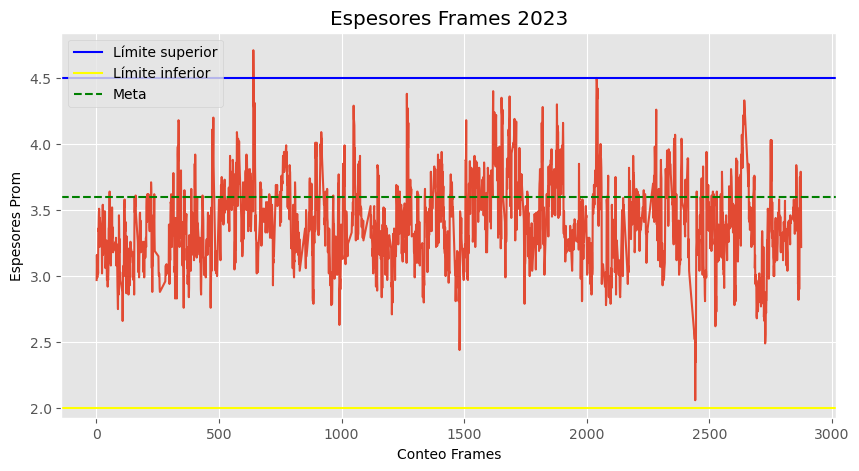

In [45]:
plt.figure(figsize = (10,5))
plt.plot(df["PROM FRAME"])
plt.xlabel("Conteo Frames")
plt.ylabel("Espesores Prom")
#plt.xlim(-20, 1830)
plt.axhline(y = LS, color = "blue", linestyle = "-", label = "Límite superior")
plt.axhline(y = LI, color = "yellow", linestyle = "-", label = "Límite inferior")
plt.axhline( y = meta, color = "green", linestyle = "--", label = "Meta")
plt.title("Espesores Frames 2023")
plt.legend()
#plt.hist(df["PROM FRAME"]) #histograma de los promedios de frame

#investigar como hacer histogramas de promedios para los diferentes modelos

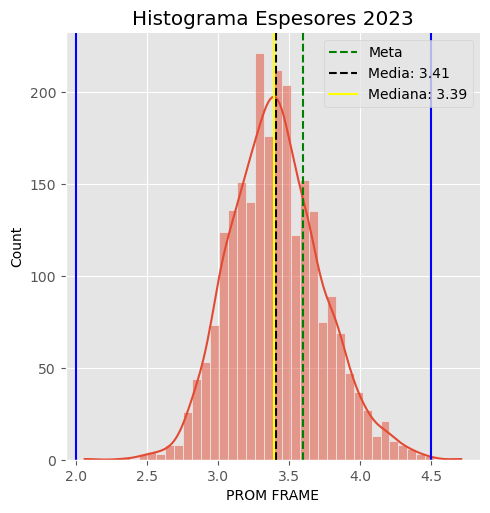

In [46]:
sns.displot(x = df["PROM FRAME"], kde = True)
plt.axvline(x=2, color='blue', linestyle='-')
plt.axvline(x=4.5, color='blue', linestyle='-')
plt.axvline(x=3.6, color='green', linestyle='--', label = "Meta")
plt.axvline(x=np.mean(df["PROM FRAME"]), color='black', linestyle='--', 
            label = f'Media: {np.mean(df["PROM FRAME"]):.2f}')
plt.axvline(x=np.median(df["PROM FRAME"]), color='yellow', linestyle='-',
           label = f'Mediana: {np.median(df["PROM FRAME"]):.2f}' )
plt.legend()
plt.title("Histograma Espesores 2023")
plt.show()

### Análisis Six Sigma

Capacidad del proceso en promedios hasta ahora

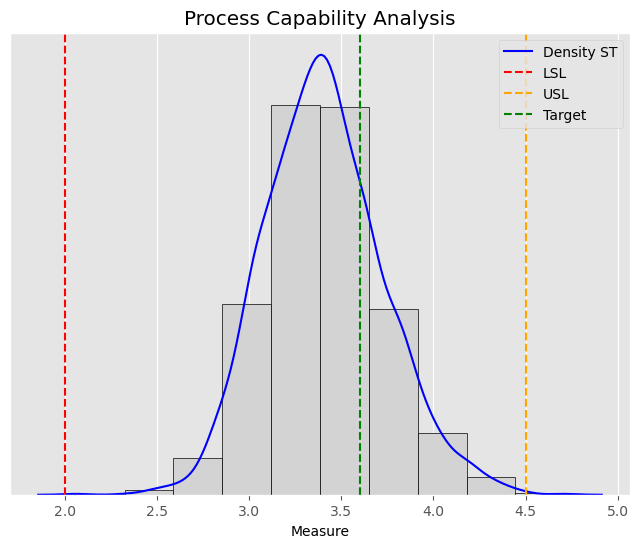

In [47]:
# Set specification limits
target = 3.6
LSL = 2
USL = 4.5

# Generate normally distributed data points
data = df["PROM FRAME"]

# Generate probability density function 
x = np.linspace(min(data), max(data), 1000)
y = norm.pdf(x, loc=5, scale=1)

# Plot histogram for data along with probability density functions and specification limits
plt.figure(figsize=(8,6))
plt.hist(data, color="lightgrey", edgecolor="black", density=True)
sns.kdeplot(data, color="blue", label="Density ST")
#plt.plot(x, y, linestyle="--", color="black", label="Theorethical Density ST")
plt.axvline(LSL, linestyle="--", color="red", label="LSL")
plt.axvline(USL, linestyle="--", color="orange", label="USL")
plt.axvline(target, linestyle="--", color="green", label="Target")
plt.title('Process Capability Analysis')
plt.xlabel("Measure")
plt.ylabel("")
plt.yticks([])
plt.legend()
plt.show()

In [48]:
# Set specification limits
target = 3.6
LSL = 2
USL = 4.5
data = df["PROM FRAME"]

# Calculate Cp
Cp = (USL-LSL)/(6*np.std(data))

# Calculate Cpk
Cpk = min((USL-data.mean())/(3*data.std()), (data.mean()-LSL)/(3*data.std()))

# Calculate z-value
z = min((USL-data.mean())/(data.std()), (data.mean()-LSL)/(data.std()))

# Get data summary statistics
num_samples = len(data)
sample_mean = data.mean()
sample_std = data.std()
sample_max = data.max()
sample_min = data.min()
sample_median = np.median(data)

# Get percentage of data points outside of specification limits
pct_below_LSL = len(data[data < LSL])/len(data)*100
pct_above_USL = len(data[data > USL])/len(data)*100

# Write .txt file with results
with open('process_results.txt', "w") as results:
    results.write("PROCESS CAPABILITY ANALYSIS\n")
    
    results.write("-----------------------------------\n")
    results.write(f"Specifications\n")
    results.write(f"\nTaget: {target}\n")
    results.write(f"LSL: {LSL}\n")
    results.write(f"USL: {USL}\n")    
    
    results.write("-----------------------------------\n")
    results.write(f"Indices\n")
    results.write(f"\nCp: {round(Cp,2)}\n")
    results.write(f"Cpk: {round(Cpk,2)}\n")
    results.write(f"z: {round(z,2)}\n")
    
    results.write("-----------------------------------\n")
    results.write(f"Summary Statistics\n")
    results.write(f"\nNumber of samples: {round(num_samples,2)}\n")
    results.write(f"Sample mean: {round(sample_mean,2)}\n")
    results.write(f"Sample std: {round(sample_std,2)}\n")
    results.write(f"Sample max: {round(sample_max,2)}\n")
    results.write(f"Sample min: {round(sample_min,2)}\n")
    results.write(f"Sample median: {round(sample_median,2)}\n")
    
    results.write(f"Percentage of data points below LSL: {round(pct_below_LSL,2)}%\n")
    results.write(f"Percentage of data points above USL: {round(pct_above_USL,2)}%\n")

Datos de los ultimos 4 meses (julio-octubre)

Text(0.5, 1.0, 'Espesores Frames Jul-Oct 2023')

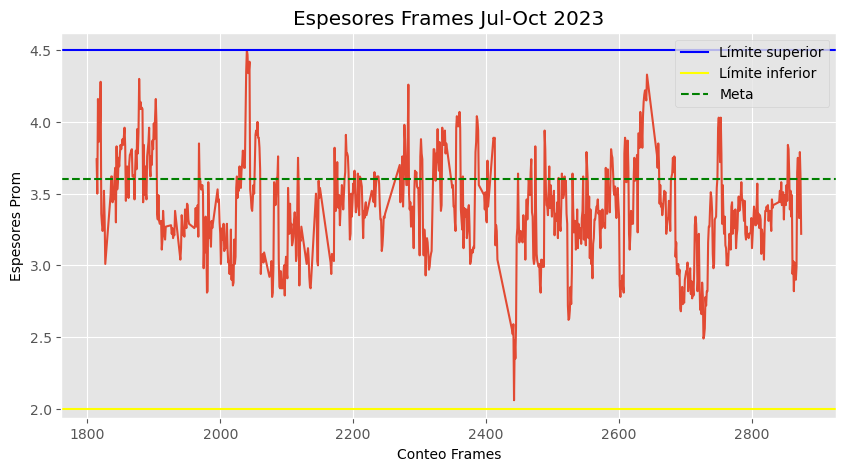

In [49]:
plt.figure(figsize = (10,5))
plt.plot(df_reciente["PROM FRAME"])
plt.xlabel("Conteo Frames")
plt.ylabel("Espesores Prom")
#plt.xlim(-20, 1830)
plt.axhline(y = 4.5, color = "blue", linestyle = "-", label = "Límite superior")
plt.axhline(y = 2, color = "yellow", linestyle = "-", label = "Límite inferior")
plt.axhline( y = 3.6, color = "green", linestyle = "--", label = "Meta")
plt.legend()
plt.title("Espesores Frames Jul-Oct 2023")

Text(0.5, 1.0, 'Espesores Frames Jul-Oct 2023')

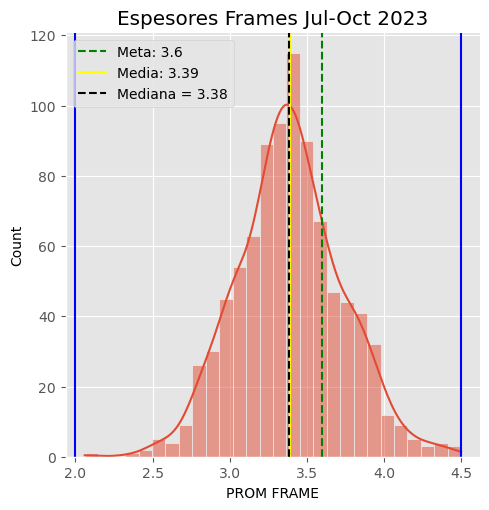

In [43]:
sns.displot(x = df_reciente["PROM FRAME"], kde = True)
plt.axvline(x=2, color='blue', linestyle='-')
plt.axvline(x=4.5, color='blue', linestyle='-')
plt.axvline(x=3.6, color='green', linestyle='--', label=f"Meta: 3.6")
plt.axvline(x = np.mean(df_reciente["PROM FRAME"]), color = "yellow",
                        label=f'Media: {np.mean(df_reciente["PROM FRAME"]):.2f}')

plt.axvline(x = np.median(df_reciente["PROM FRAME"]), color = "black", linestyle = "--",
                       label=f'Mediana = {np.median(df_reciente["PROM FRAME"]):.2f}')
#plt.axvline(x = moda, color = "yellow", linestyle="-", label = f"Moda: {moda[0]:.2f}")
plt.legend()
plt.title("Espesores Frames Jul-Oct 2023")

####  Los promedios parecen estar bien, pero son engañosos, debemos centrarnos en las 8 mediciones de las caras interna y externa para ver en donde es mas probable que haya espesor alto y que afecte al promedio.

Empecemos por un mapa de correlacion en el dataframe de 3 meses y de todo el año:

Text(0.5, 1.0, 'Mapa de correlación Prom Espesores 2023')

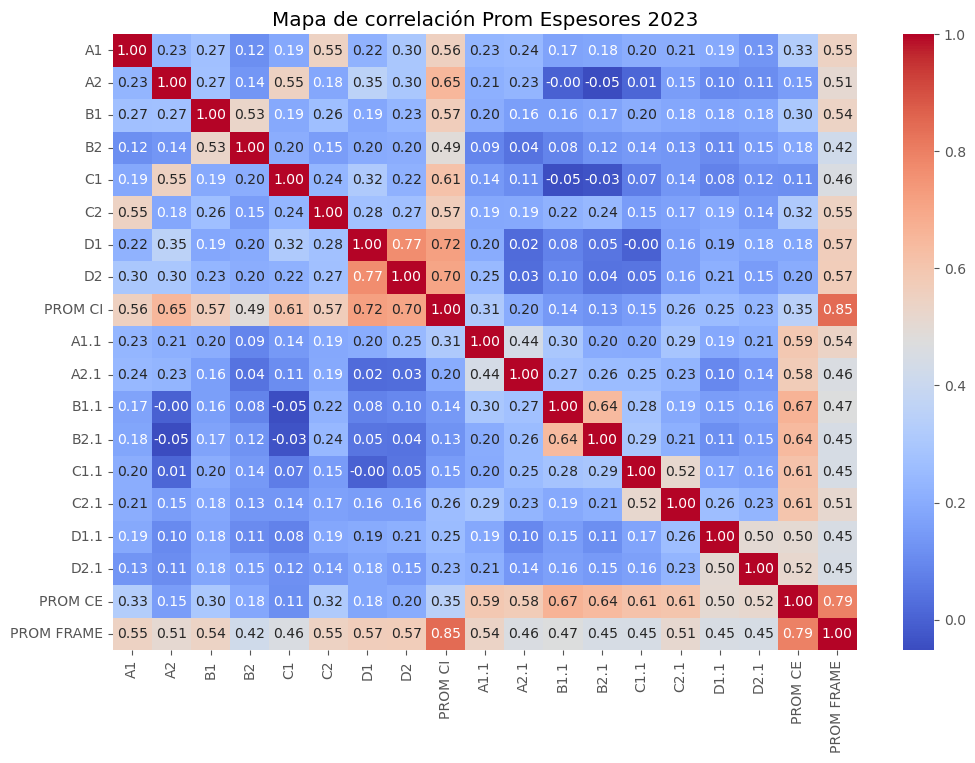

In [44]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only = True)
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt = ".2f") #en este caso no es necesario eliminar columnas del df
plt.title("Mapa de correlación Prom Espesores 2023")

Text(0.5, 1.0, 'Mapa de correlación JUL - OCT 2023')

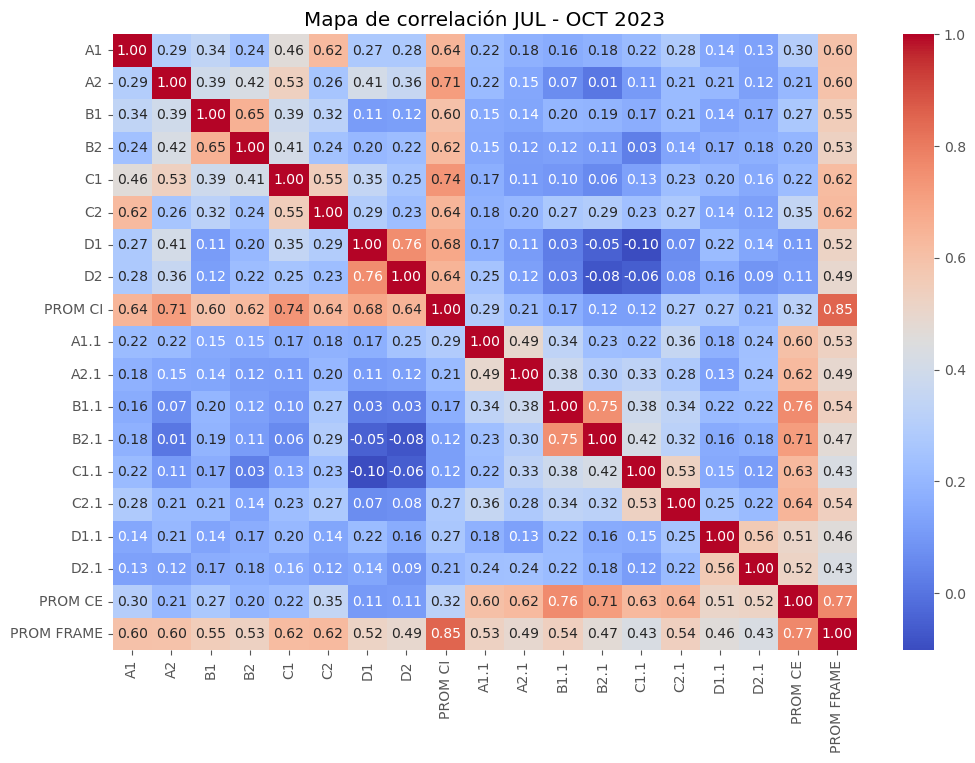

In [45]:
plt.figure(figsize = (12,8))
correlation_matrix = df_reciente.corr(numeric_only = True)
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = "coolwarm") #en este caso no es necesario eliminar columnas del df
plt.title("Mapa de correlación JUL - OCT 2023")

Se puede observar que el promedio de la cara interna esta mas fuertemente relacionado con el promedio del frame que el de la cara externa, esto sin contar el modelo MKE10943.

Las dos columnas mas relacionadas con el promedio de la cara interna son: D1 y D2.
Las dos columnas mas relacionadas con el promedio de la cara interna son: A2 y C1 en el set de datos reciente.

Analicemos los histogramas por modelo, de los ultimos 3 meses y en 2023

/var/folders/_d/34b5thn90fj_93zjmbzv253c0000gn/T/ipykernel_15992/2677777273.py:23: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  axs[i].axvline(x = stats.mode(data_modelo).mode[0], color='black', linestyle="-")


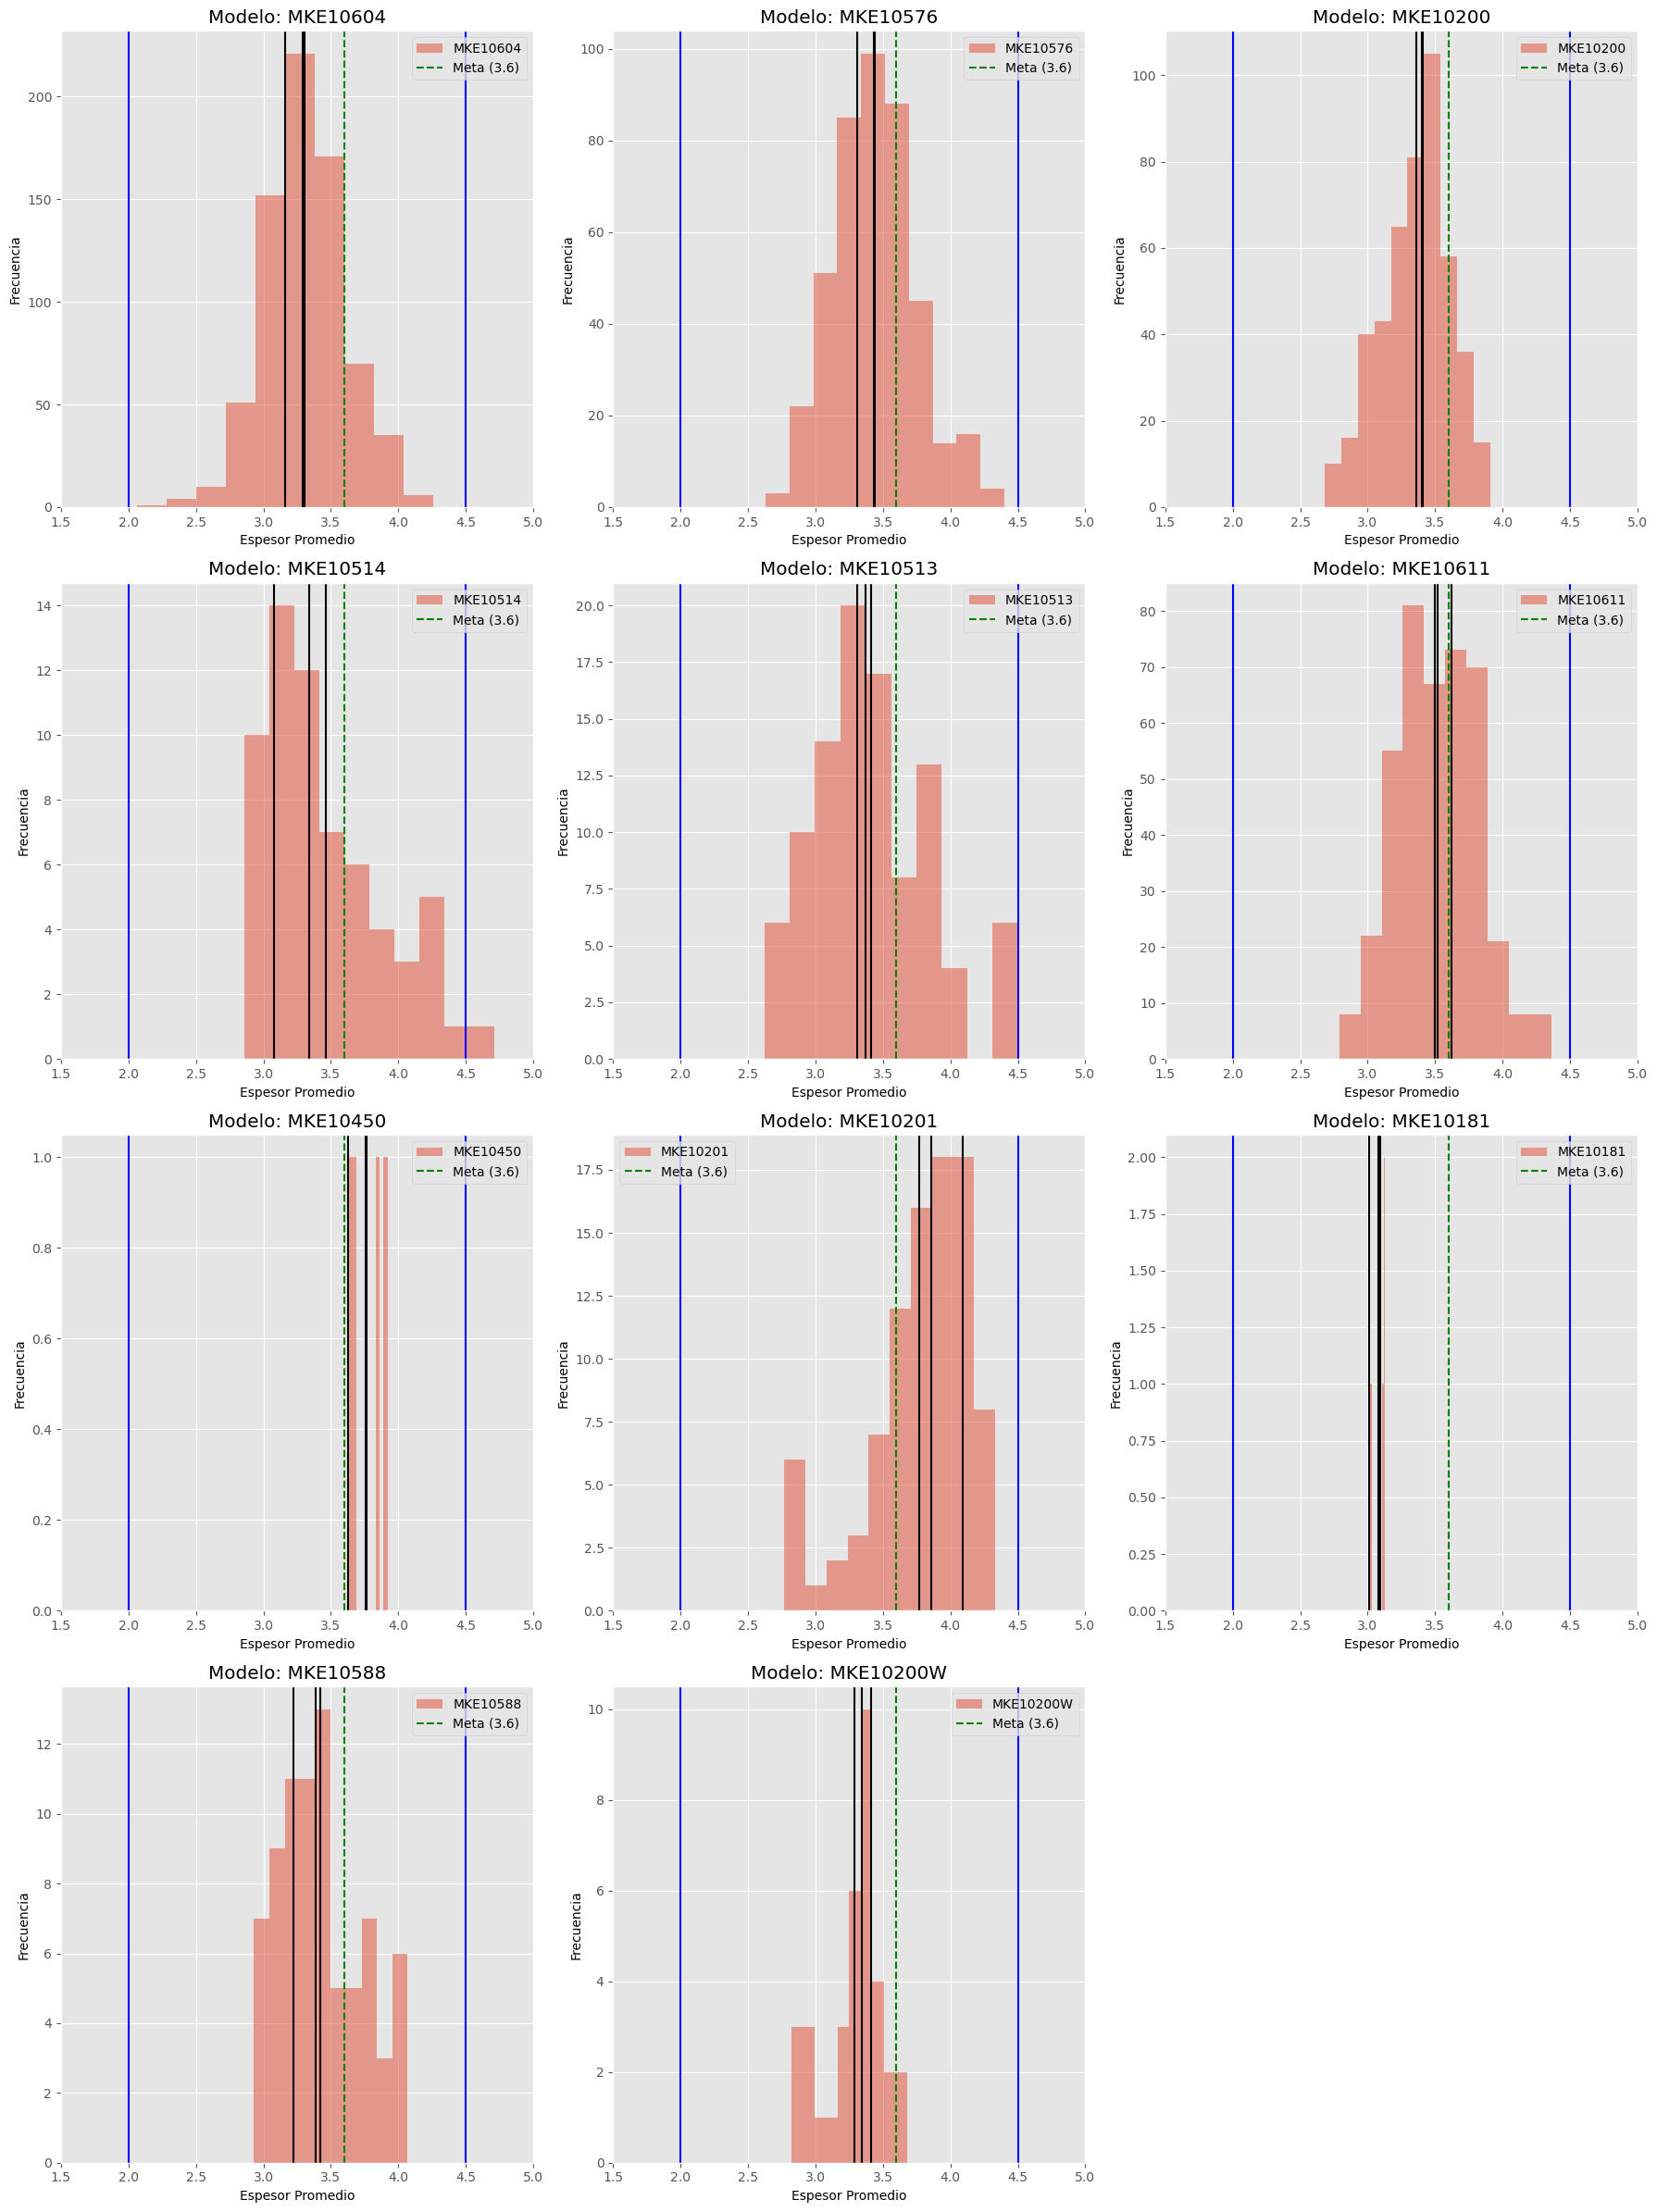

In [46]:
# Obtener la lista de modelos únicos
modelos = df["MODELO"].unique()

# Calcular el número de filas y columnas para organizar las gráficas
num_filas = len(modelos) // 3 + (len(modelos) % 3 > 0)
num_columnas = 3

# Crear una figura con subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(18, 6 * num_filas))
axs = axs.ravel()

# Iterar a través de los modelos y crear histogramas en subplots individuales
for i, modelo in enumerate(modelos):
    data_modelo = df[df["MODELO"] == modelo]["PROM FRAME"]
    
    # Gráfico de histograma para el modelo actual
    axs[i].hist(data_modelo, bins=10, alpha=0.5, label=modelo)
    axs[i].axvline(x=4.5, color="blue", linestyle="-")
    axs[i].axvline(x=2, color="blue", linestyle="-")
    axs[i].axvline(x=3.6, color="green", linestyle="--", label="Meta (3.6)")
    axs[i].axvline(x = np.median(data_modelo), color='black', linestyle="-")
    axs[i].axvline(x = np.mean(data_modelo), color='black', linestyle="-")
    axs[i].axvline(x = stats.mode(data_modelo).mode[0], color='black', linestyle="-")

    axs[i].set_xlim(1.5, 5)
    axs[i].set_xlabel("Espesor Promedio")
    axs[i].set_ylabel("Frecuencia")
    axs[i].set_title(f"Modelo: {modelo}")
    axs[i].legend()

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Eliminar subplots vacíos si no hay suficientes modelos para llenar todas las filas y columnas
if len(modelos) < num_filas * num_columnas:
    for i in range(len(modelos), num_filas * num_columnas):
        fig.delaxes(axs[i])

plt.tight_layout
plt.show()

Vemos que los que tienen mas espesor alto en sus promedios son los modelos: MKE10611, MKE10201, MKE10513/514

Ahora veamos en los ultimos 3 meses:

/var/folders/_d/34b5thn90fj_93zjmbzv253c0000gn/T/ipykernel_15992/2421189732.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_modelo, label = modelo)
/var/folders/_d/34b5thn90fj_93zjmbzv253c0000gn/T/ipykernel_15992/2421189732.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_mode

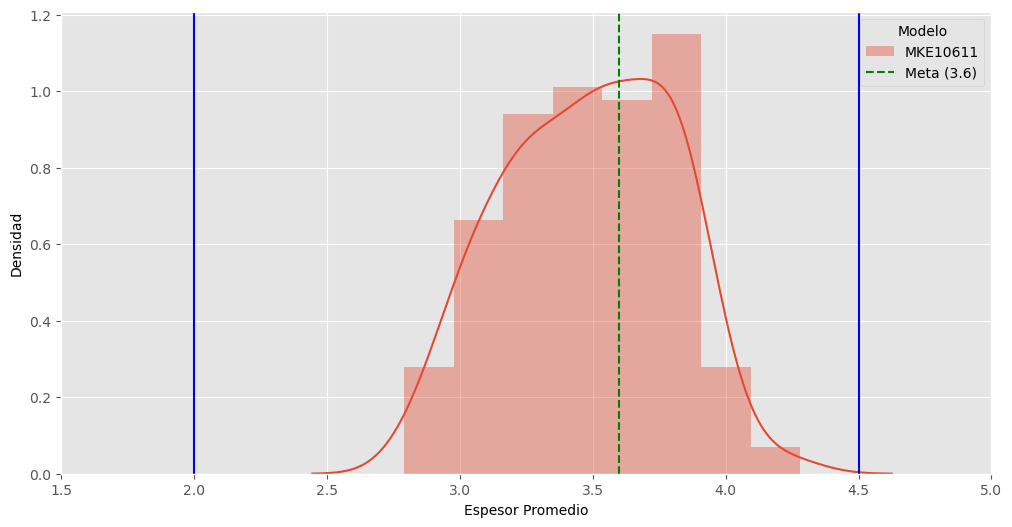

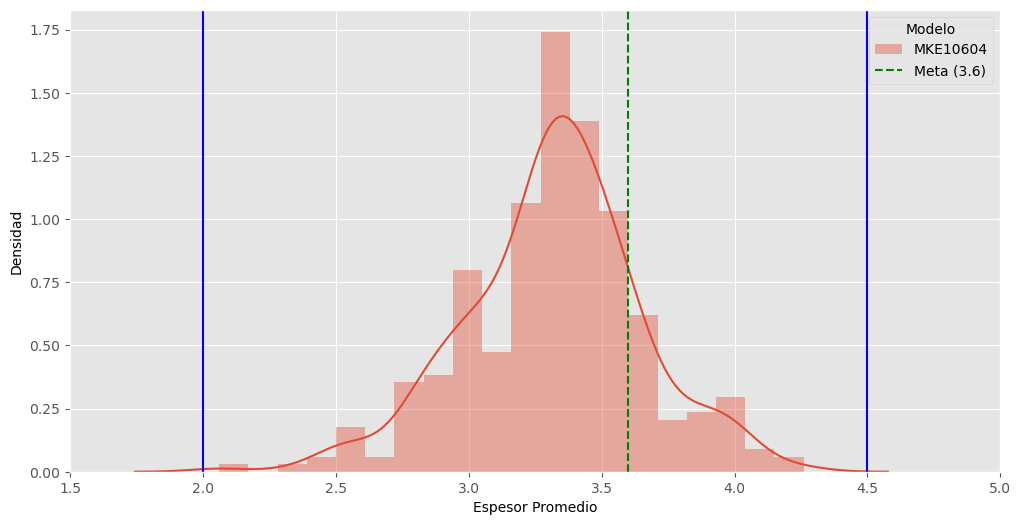

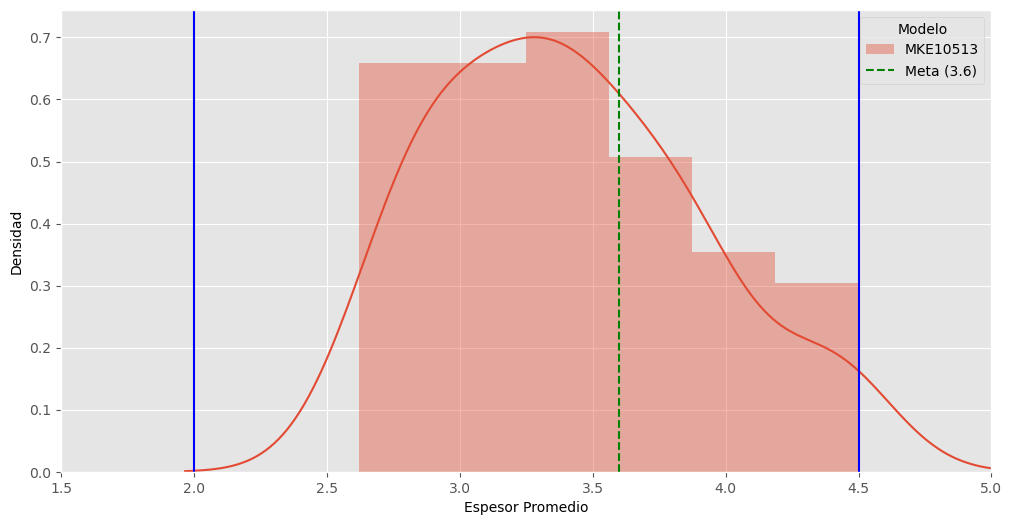

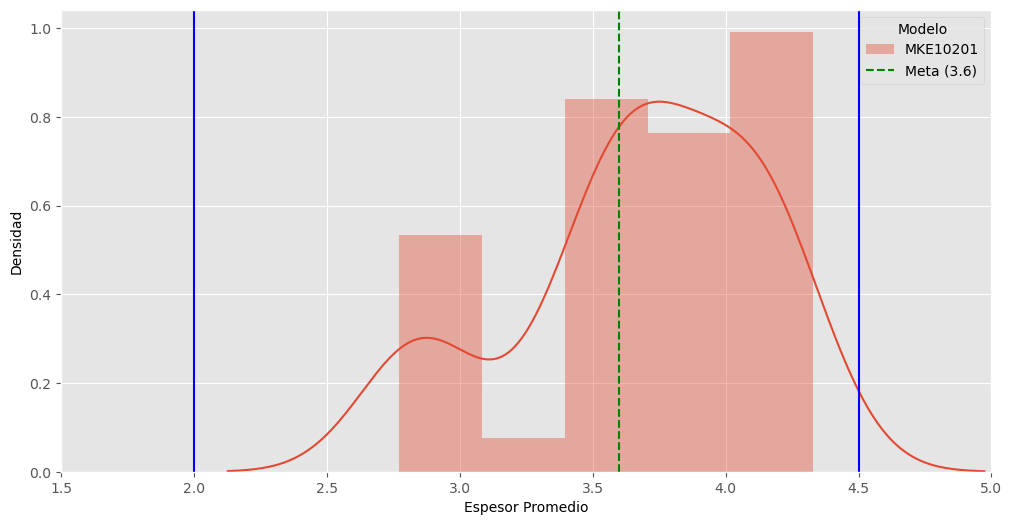

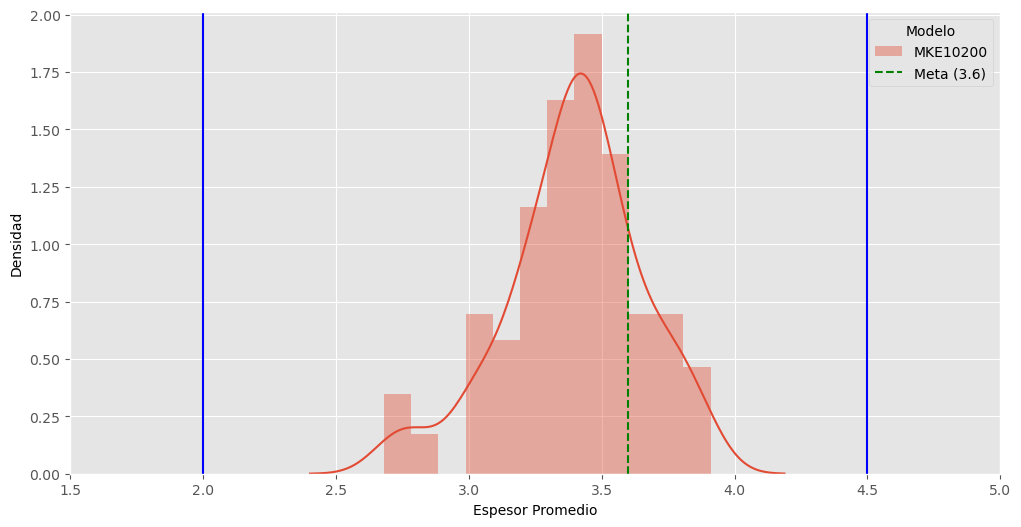

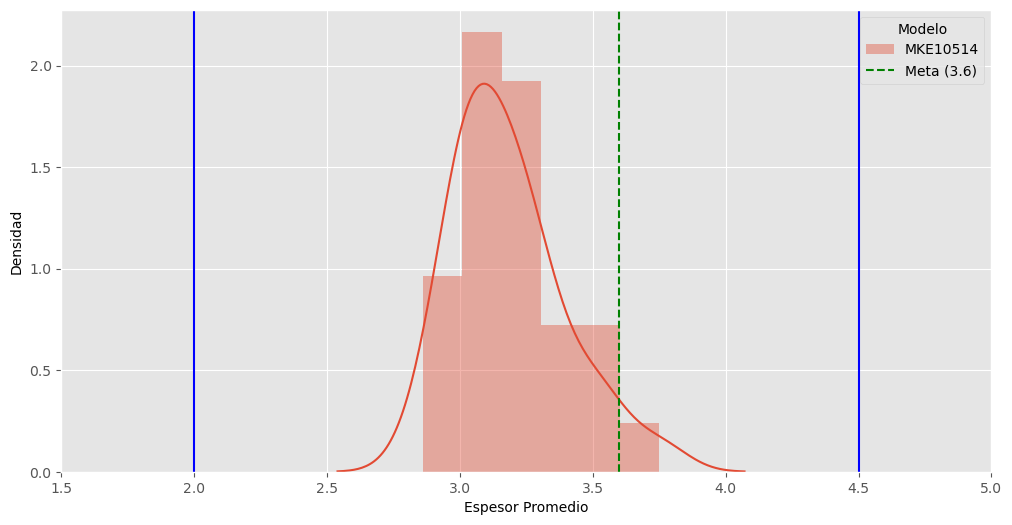

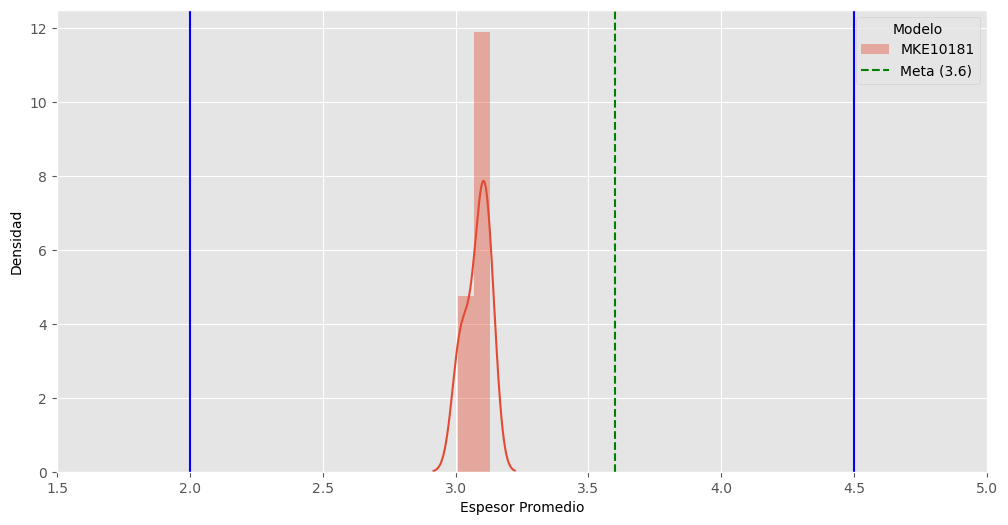

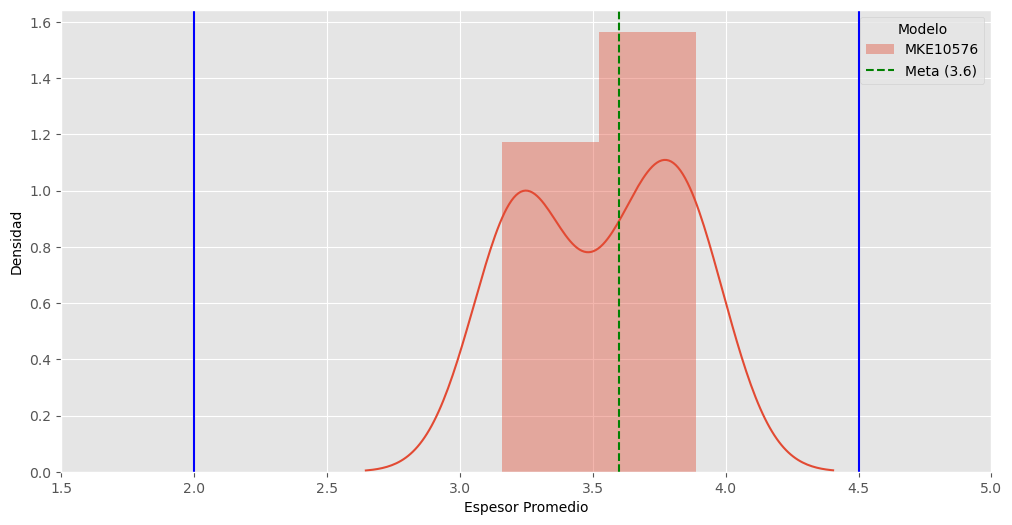

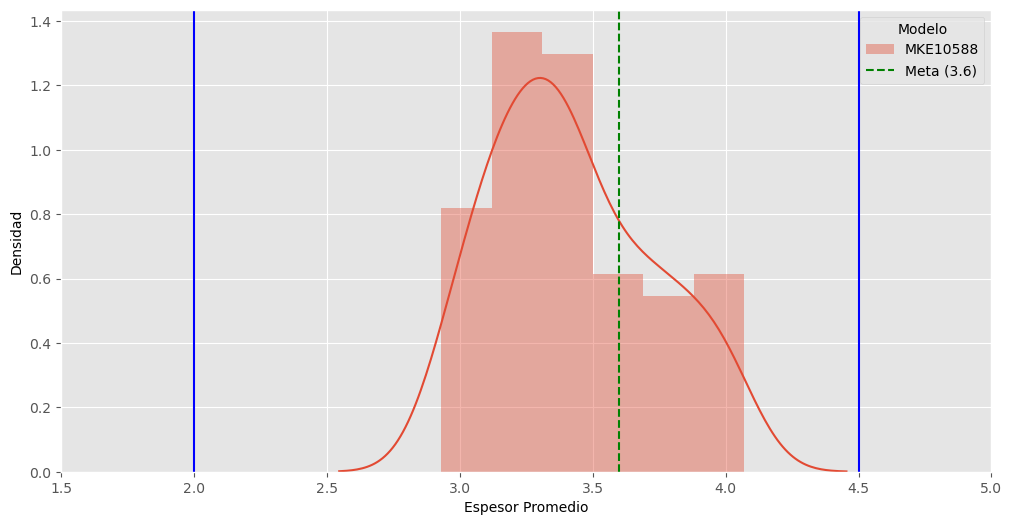

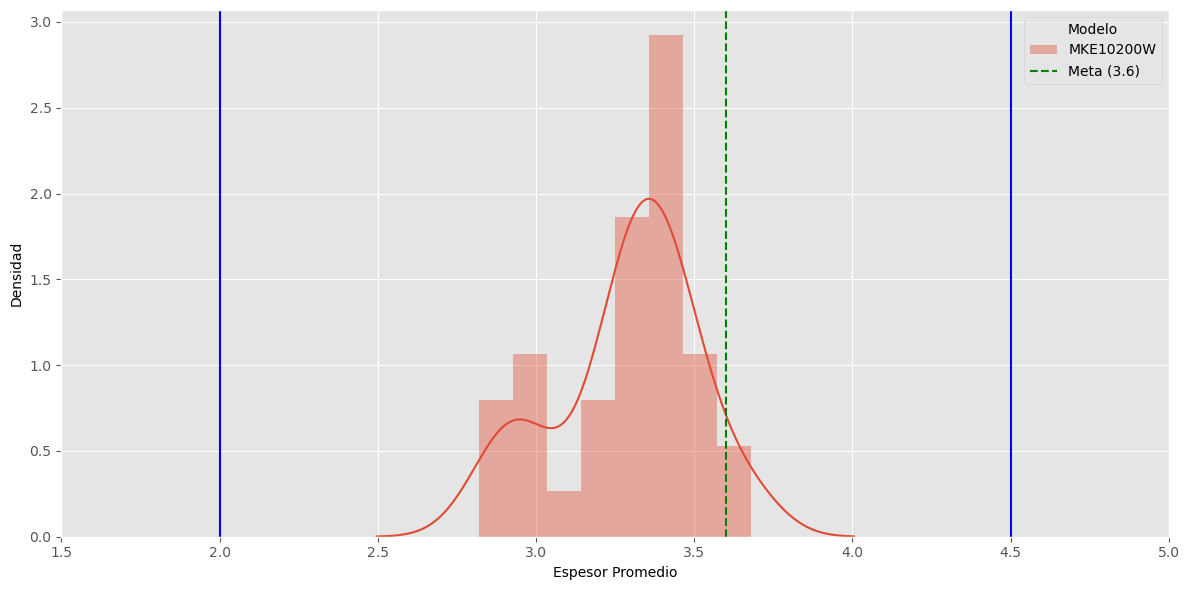

In [50]:
modelos = df_reciente["MODELO"].unique()

#Para cada modelo de la lista
for modelo in modelos:
    plt.figure(figsize=(12,6))
    
    data_modelo = df_reciente[df_reciente["MODELO"] == modelo]["PROM FRAME"]

    #Gráficos
    sns.distplot(data_modelo, label = modelo)
    plt.axvline(x = 4.5, color = "blue", linestyle = "-")
    plt.axvline(x = 2, color = "blue", linestyle = "-")
    plt.axvline(x = 3.6, color = "green", linestyle = "--", label = "Meta (3.6)")
    plt.xlim(1.5, 5)
    plt.xlabel("Espesor Promedio")
    plt.ylabel("Densidad")
    plt.legend(title = "Modelo")
    
plt.tight_layout()
plt.show()

El modelo que mas se corre es el MKE10604, pero en base a las graficas anteriores, estaria interesante analizar la variabilidad en MKE10201 o MKE10611

Veamos los promedios recientes en las caras internas y externas

Text(0.5, 1.0, 'Promedios Frame CI Jul-Oct 2023')

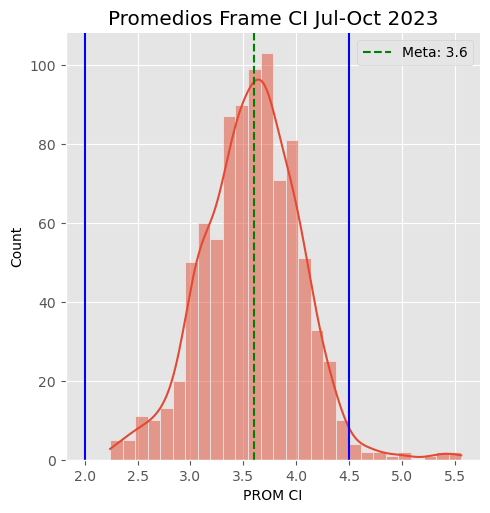

In [51]:
sns.displot(x = df_reciente["PROM CI"], kde = True)
plt.axvline(x=2, color='blue', linestyle='-')
plt.axvline(x=4.5, color='blue', linestyle='-')
plt.axvline(x=3.6, color='green', linestyle='--', label=f"Meta: 3.6")
#plt.axvline(x = np.mean(df_reciente["PROM FRAME"]), color = "yellow",
 #                       label=f'Media: {np.mean(df_reciente["PROM FRAME"]):.2f}')

#plt.axvline(x = np.median(df_reciente["PROM FRAME"]), color = "black", linestyle = "--",
       #                label=f'Mediana = {np.median(df_reciente["PROM FRAME"]):.2f}')
#plt.axvline(x = moda, color = "yellow", linestyle="-", label = f"Moda: {moda[0]:.2f}")
plt.legend()
plt.title("Promedios Frame CI Jul-Oct 2023")

Text(0.5, 1.0, 'Promedios Frame CE Jul-Oct 2023')

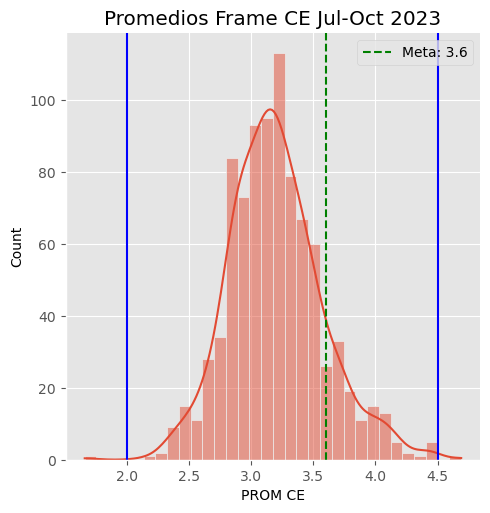

In [52]:
sns.displot(x = df_reciente["PROM CE"], kde = True)
plt.axvline(x=2, color='blue', linestyle='-')
plt.axvline(x=4.5, color='blue', linestyle='-')
plt.axvline(x=3.6, color='green', linestyle='--', label=f"Meta: 3.6")
#plt.axvline(x = np.mean(df_reciente["PROM FRAME"]), color = "yellow",
 #                       label=f'Media: {np.mean(df_reciente["PROM FRAME"]):.2f}')

#plt.axvline(x = np.median(df_reciente["PROM FRAME"]), color = "black", linestyle = "--",
       #                label=f'Mediana = {np.median(df_reciente["PROM FRAME"]):.2f}')
#plt.axvline(x = moda, color = "yellow", linestyle="-", label = f"Moda: {moda[0]:.2f}")
plt.legend()
plt.title("Promedios Frame CE Jul-Oct 2023")

Hay mas espesores altos en Cara Interna

In [53]:
df_reciente["PROM CI"].describe()

count    896.000000
mean       3.582087
std        0.459005
min        2.240000
25%        3.300000
50%        3.600000
75%        3.890000
max        5.560000
Name: PROM CI, dtype: float64

In [54]:
df_reciente["PROM CE"].describe()

count    896.000000
mean       3.196775
std        0.379124
min        1.660000
25%        2.940000
50%        3.180000
75%        3.410000
max        4.690000
Name: PROM CE, dtype: float64

In [55]:
df_reciente["MODELO"].unique()

array(['MKE10611', 'MKE10604', 'MKE10513', 'MKE10201', 'MKE10200',
       'MKE10514', 'MKE10181', 'MKE10576', 'MKE10588', 'MKE10200W'],
      dtype=object)

Agrupemos por modelo y visualicemos los promedios en cada área de medición.

In [56]:
promedios = df_reciente.groupby(by = "MODELO").mean()

/var/folders/_d/34b5thn90fj_93zjmbzv253c0000gn/T/ipykernel_15992/3793049191.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  promedios = df_reciente.groupby(by = "MODELO").mean()


In [57]:
round(promedios, 2)

,A1,A2,B1,B2,C1,C2,D1,D2,PROM CI,A1.1,A2.1,B1.1,B2.1,C1.1,C2.1,D1.1,D2.1,PROM CE,PROM FRAME
MODELO,,,,,,,,,,,,,,,,,,,
MKE10181,3.19,3.36,3.34,2.77,3.07,3.11,3.04,2.96,3.11,2.47,3.31,3.51,3.37,3.04,3.26,2.81,2.69,3.06,3.08
MKE10200,3.20,3.80,3.40,3.54,3.56,3.48,4.20,4.03,3.65,3.23,3.14,3.36,3.22,2.97,3.11,3.02,3.05,3.13,3.39
MKE10200W,3.00,4.06,2.89,3.25,3.80,3.34,4.11,3.81,3.53,3.17,2.99,3.16,3.00,2.77,3.06,3.15,3.05,3.04,3.29
MKE10201,3.57,3.32,3.23,3.20,3.44,3.68,3.73,3.64,3.48,4.06,4.03,3.94,4.01,3.93,3.72,3.64,3.76,3.89,3.68
MKE10513,3.14,3.58,3.68,3.72,3.57,3.23,3.87,3.86,3.58,2.97,3.13,3.58,3.52,3.21,3.13,3.20,3.17,3.24,3.41
MKE10514,2.79,3.04,3.12,3.05,3.15,3.25,3.09,3.42,3.11,3.25,3.34,3.42,3.62,3.89,3.05,2.57,2.85,3.25,3.18
MKE10576,4.24,4.55,3.21,2.74,3.89,3.83,4.09,4.31,3.86,3.64,3.34,3.05,3.09,3.21,3.32,2.95,3.09,3.21,3.54
MKE10588,3.08,4.06,3.17,3.46,3.75,3.34,4.86,4.57,3.79,3.06,3.37,2.88,2.99,3.03,2.82,3.22,3.15,3.06,3.43
MKE10604,3.37,3.41,3.36,3.34,3.74,3.75,3.48,3.14,3.45,2.96,3.19,3.24,3.49,3.29,3.16,3.09,3.08,3.19,3.32


In [58]:
from scipy import stats

In [59]:
df_reciente

,MODELO,TURNO,DIA,A1,A2,B1,B2,C1,C2,D1,...,A1.1,A2.1,B1.1,B2.1,C1.1,C2.1,D1.1,D2.1,PROM CE,PROM FRAME
1814,MKE10611,T1,2023-07-01,3.0,4.8,3.8,4.1,4.5,3.5,5.3,...,2.8,3.4,3.3,3.5,2.6,3.9,4.0,3.3,3.35,3.74
1815,MKE10611,T1,2023-07-01,3.4,4.8,3.6,3.9,3.4,3.6,4.8,...,3.3,2.6,3.2,2.9,2.4,3.4,3.8,3.1,3.09,3.50
1816,MKE10611,T1,2023-07-01,3.8,5.8,4.1,4.4,4.8,4.0,5.2,...,4.1,3.2,4.2,3.5,2.9,4.0,4.3,3.7,3.74,4.16
1817,MKE10611,T1,2023-07-01,3.0,5.0,3.6,3.4,5.1,3.8,5.1,...,3.8,3.5,4.0,2.9,2.4,3.7,4.8,3.6,3.59,3.86
1818,MKE10611,T1,2023-07-01,3.2,5.4,3.3,3.6,5.1,3.8,4.3,...,3.8,4.1,3.8,3.3,2.8,3.9,4.2,3.7,3.70,3.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,MKE10200,T2,2023-11-07,3.3,4.6,4.0,3.3,3.6,3.2,4.2,...,3.0,3.7,3.5,3.0,3.1,3.2,3.1,3.1,3.21,3.48
2871,MKE10200,T2,2023-11-07,2.9,3.7,3.5,3.2,3.0,3.1,5.0,...,3.4,4.1,3.2,4.0,3.1,3.0,2.5,2.5,3.22,3.33
2872,MKE10200,T2,2023-11-07,3.1,5.0,3.8,4.6,3.7,3.6,5.0,...,2.6,4.0,3.7,3.6,2.6,3.5,3.6,3.6,3.40,3.79
2873,MKE10200,T2,2023-11-07,3.4,4.8,4.0,4.2,4.1,3.5,5.0,...,2.7,3.9,3.6,3.6,3.1,2.6,2.5,2.5,3.06,3.62


Enfoquémonos a un nuevo df solo con datos de cara interna

In [60]:
ci = ["MODELO", "TURNO","DIA", "A1", "A2", "B1", "B2","C1","C2","D1","D2", "PROM CI"]
df_ci = df_reciente[ci]
df_ci

,MODELO,TURNO,DIA,A1,A2,B1,B2,C1,C2,D1,D2,PROM CI
1814,MKE10611,T1,2023-07-01,3.0,4.8,3.8,4.1,4.5,3.5,5.3,4.0,4.12
1815,MKE10611,T1,2023-07-01,3.4,4.8,3.6,3.9,3.4,3.6,4.8,3.8,3.91
1816,MKE10611,T1,2023-07-01,3.8,5.8,4.1,4.4,4.8,4.0,5.2,4.5,4.58
1817,MKE10611,T1,2023-07-01,3.0,5.0,3.6,3.4,5.1,3.8,5.1,4.1,4.14
1818,MKE10611,T1,2023-07-01,3.2,5.4,3.3,3.6,5.1,3.8,4.3,4.1,4.10
...,...,...,...,...,...,...,...,...,...,...,...,...
2870,MKE10200,T2,2023-11-07,3.3,4.6,4.0,3.3,3.6,3.2,4.2,3.8,3.75
2871,MKE10200,T2,2023-11-07,2.9,3.7,3.5,3.2,3.0,3.1,5.0,3.1,3.44
2872,MKE10200,T2,2023-11-07,3.1,5.0,3.8,4.6,3.7,3.6,5.0,4.6,4.18
2873,MKE10200,T2,2023-11-07,3.4,4.8,4.0,4.2,4.1,3.5,5.0,4.5,4.19


In [61]:
df_ci["MODELO"].unique()

array(['MKE10611', 'MKE10604', 'MKE10513', 'MKE10201', 'MKE10200',
       'MKE10514', 'MKE10181', 'MKE10576', 'MKE10588', 'MKE10200W'],
      dtype=object)

Hagamos un heatmap de la cara interna

Text(0.5, 1.0, 'Mapa de correlación    JUL - OCT 2023      Cara Interna')

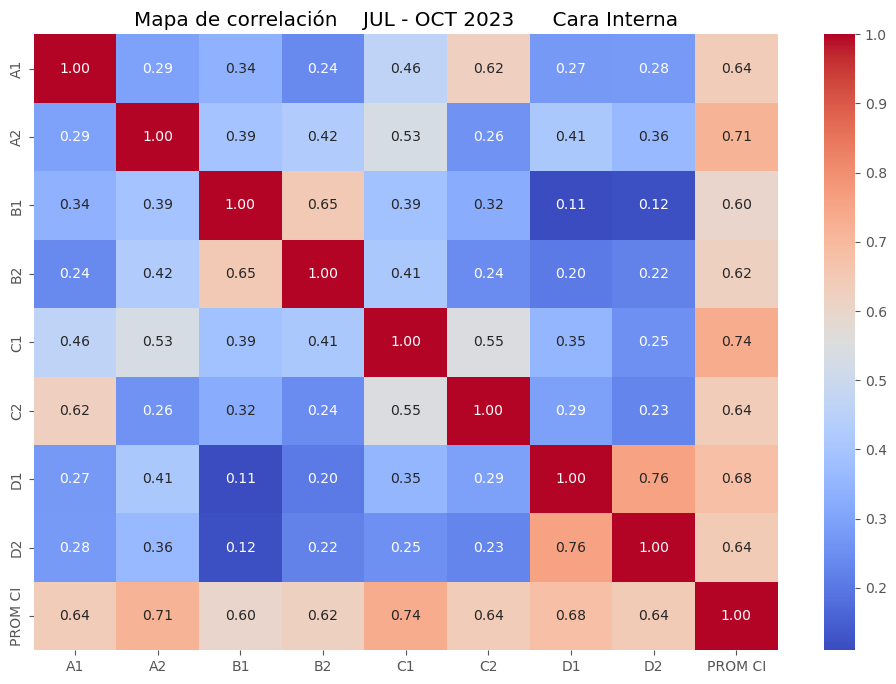

In [62]:
plt.figure(figsize = (12,8))
correlation_matrix = df_ci.corr(numeric_only = True)
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = "coolwarm") #en este caso no es necesario eliminar columnas del df
plt.title("Mapa de correlación    JUL - OCT 2023      Cara Interna")

Grafiquemos los promedios de las caras internas para cada modelo de los últimos 4 meses.

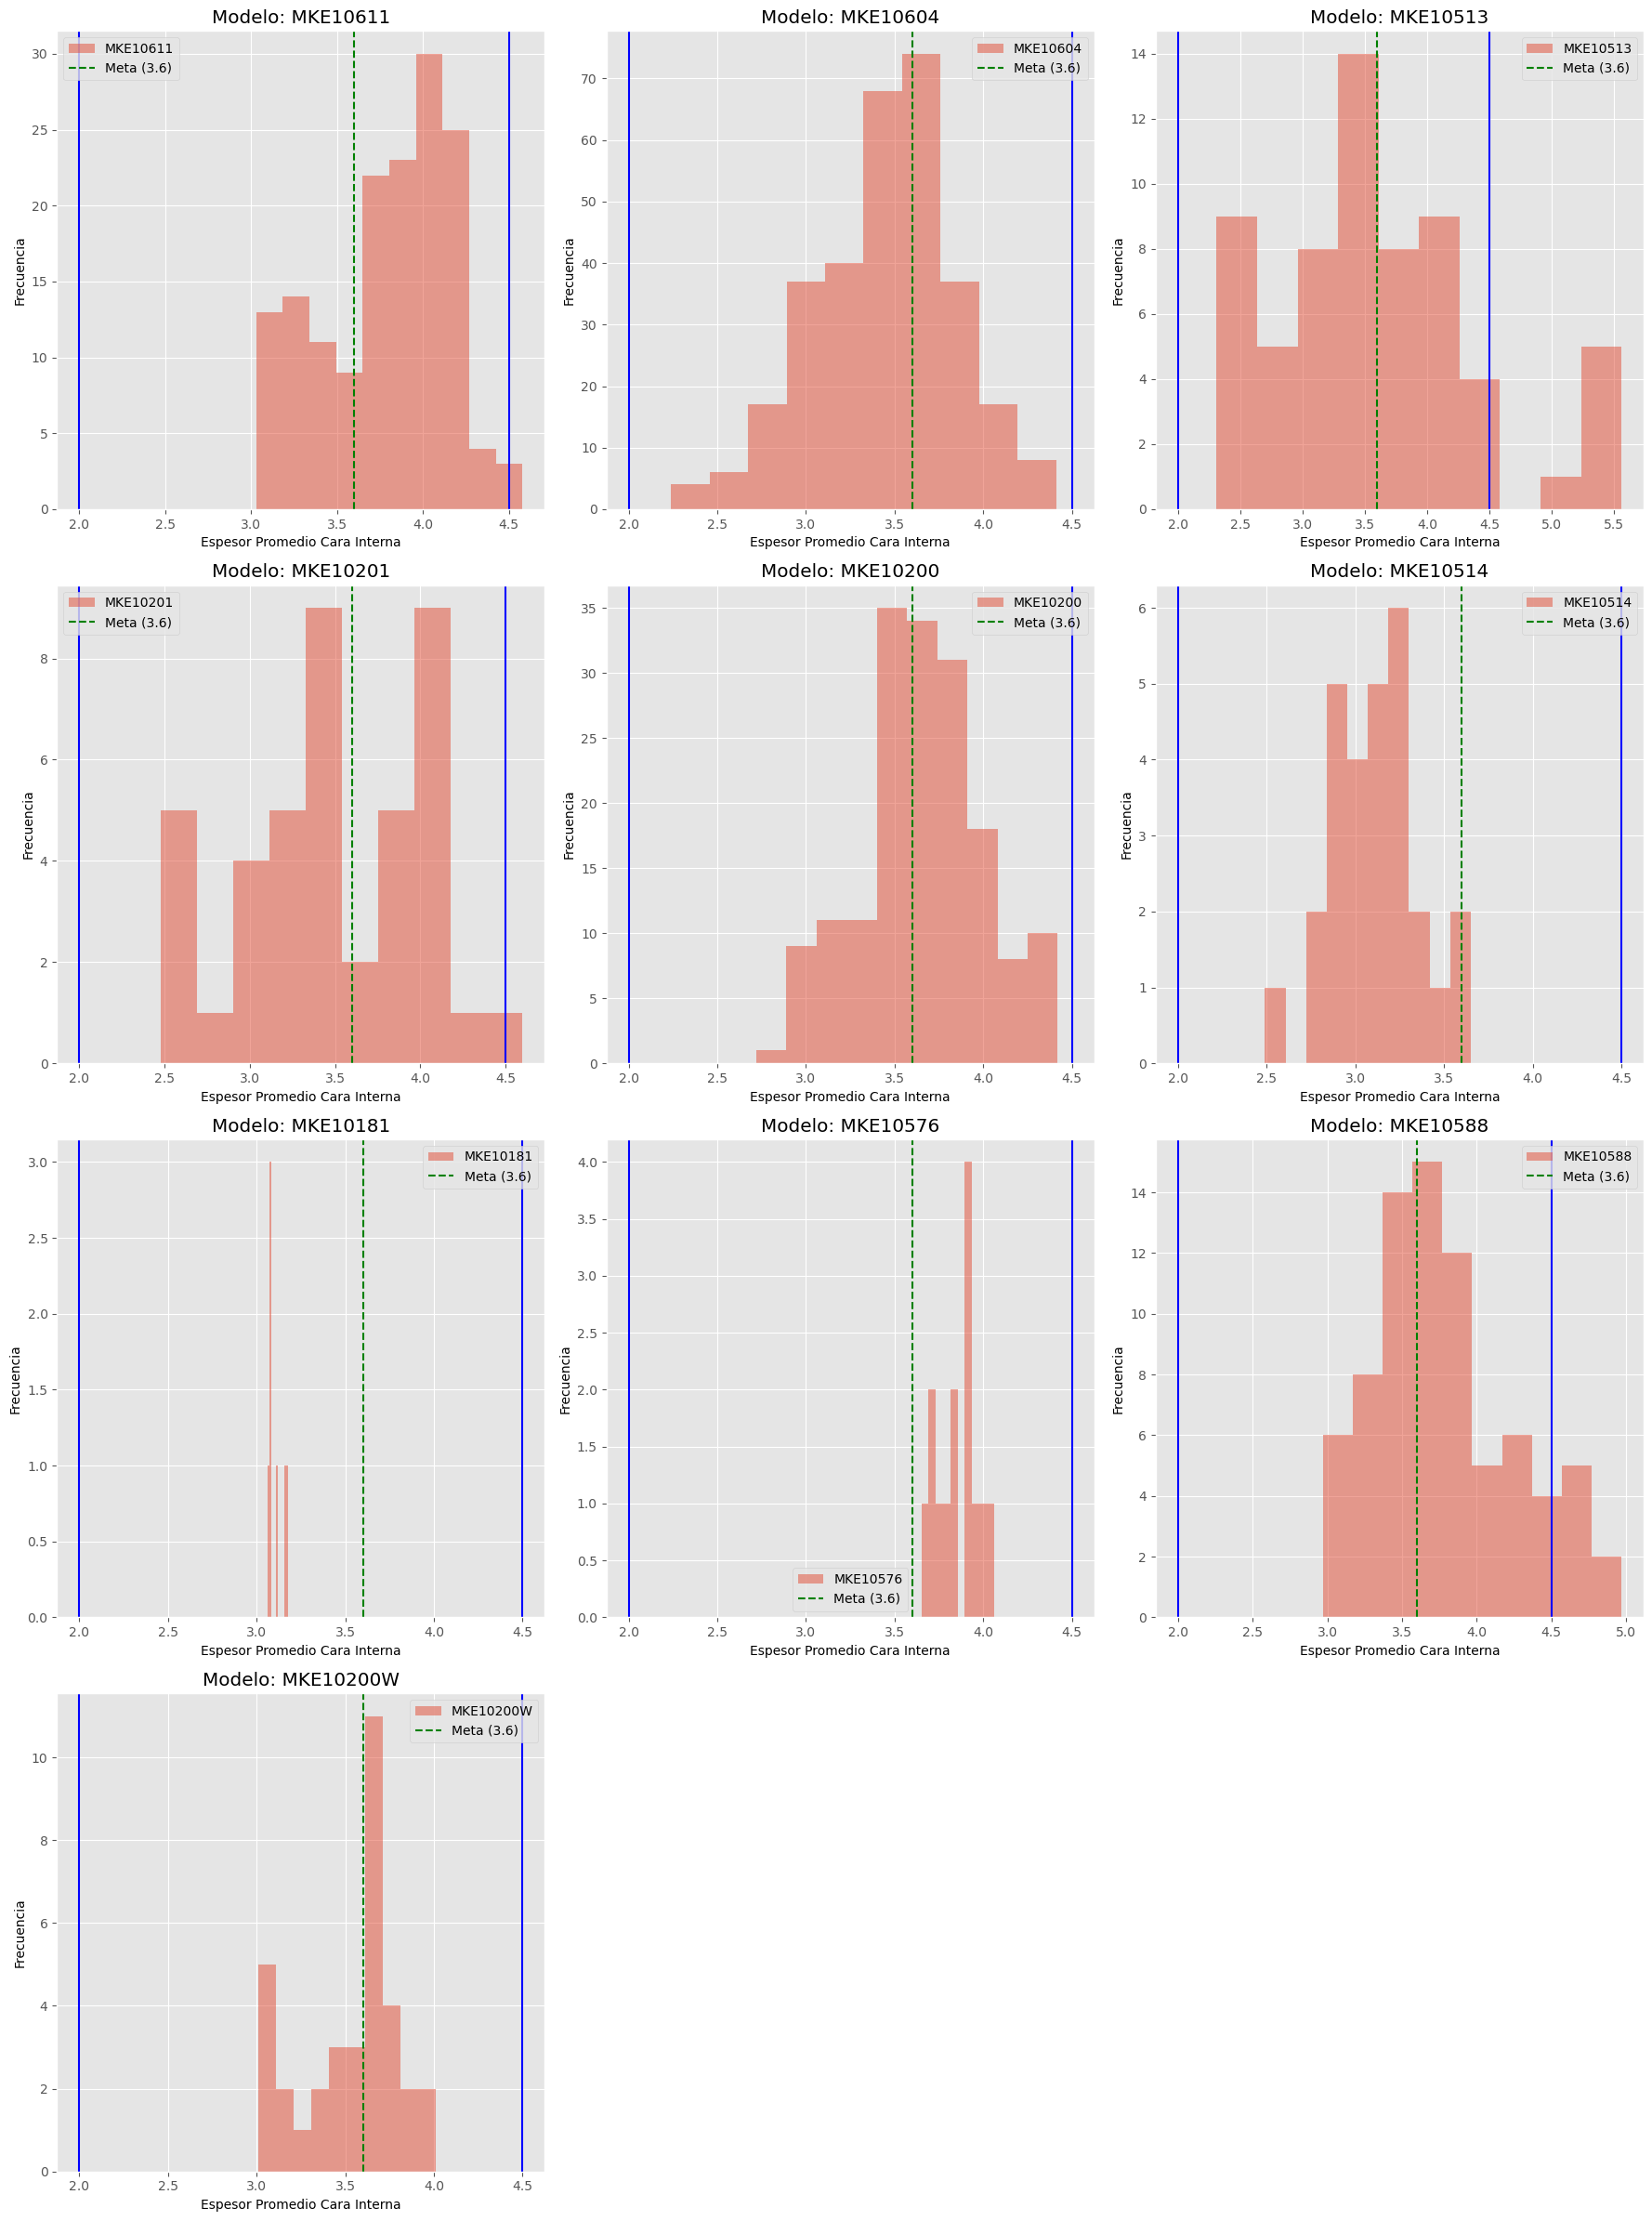

In [63]:
# Obtener la lista de modelos únicos
modelos = df_ci["MODELO"].unique()

# Calcular el número de filas y columnas para organizar las gráficas
num_filas = len(modelos) // 3 + (len(modelos) % 3 > 0)
num_columnas = 3

# Crear una figura con subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(18, 6 * num_filas))
axs = axs.ravel()

# Iterar a través de los modelos y crear histogramas en subplots individuales
for i, modelo in enumerate(modelos):
    data_modelo = df_ci[df_ci["MODELO"] == modelo]["PROM CI"]
    
    # Gráfico de histograma para el modelo actual
    axs[i].hist(data_modelo, bins=10, alpha=0.5, label=modelo)
    axs[i].axvline(x=4.5, color="blue", linestyle="-")
    axs[i].axvline(x=2, color="blue", linestyle="-")
    axs[i].axvline(x=3.6, color="green", linestyle="--", label="Meta (3.6)")
   # axs[i].set_xlim(1.5, 5)
    axs[i].set_xlabel("Espesor Promedio Cara Interna")
    axs[i].set_ylabel("Frecuencia")
    axs[i].set_title(f"Modelo: {modelo}")
    axs[i].legend()

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Eliminar subplots vacíos si no hay suficientes modelos para llenar todas las filas y columnas
if len(modelos) < num_filas * num_columnas:
    for i in range(len(modelos), num_filas * num_columnas):
        fig.delaxes(axs[i])

plt.tight_layout
plt.show()

A partir de aqui hay que quedarnos con un solo modelo

Filtremos para el modelo MKE10611

In [64]:
df_ci_611 = df_ci.drop(df_ci[df_ci["MODELO"] != "MKE10611"].index) #nuevo df con solo MKE10611

In [65]:
df_ci_611

,MODELO,TURNO,DIA,A1,A2,B1,B2,C1,C2,D1,D2,PROM CI
1814,MKE10611,T1,2023-07-01,3.0,4.8,3.8,4.1,4.5,3.5,5.3,4.0,4.12
1815,MKE10611,T1,2023-07-01,3.4,4.8,3.6,3.9,3.4,3.6,4.8,3.8,3.91
1816,MKE10611,T1,2023-07-01,3.8,5.8,4.1,4.4,4.8,4.0,5.2,4.5,4.58
1817,MKE10611,T1,2023-07-01,3.0,5.0,3.6,3.4,5.1,3.8,5.1,4.1,4.14
1818,MKE10611,T1,2023-07-01,3.2,5.4,3.3,3.6,5.1,3.8,4.3,4.1,4.10
...,...,...,...,...,...,...,...,...,...,...,...,...
2814,MKE10611,T-2,2023-11-01,2.7,2.7,3.8,4.0,3.6,3.5,2.9,3.2,3.30
2815,MKE10611,T-2,2023-11-01,2.9,3.2,3.8,4.2,3.2,3.5,3.1,3.6,3.44
2816,MKE10611,T-2,2023-11-01,2.8,2.9,3.7,3.9,3.2,3.9,3.2,3.3,3.36
2817,MKE10611,T-2,2023-11-01,2.6,3.1,3.4,3.7,3.7,3.7,3.3,3.3,3.35


In [66]:
df_ci_611.describe()

,A1,A2,B1,B2,C1,C2,D1,D2,PROM CI
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,3.241558,4.092857,3.428701,3.675974,3.896753,3.457792,4.403247,4.147403,3.793377
std,0.515093,0.763986,0.548971,0.551771,0.661492,0.504202,0.663957,0.710445,0.366118
min,2.100000,2.600000,2.200000,2.400000,2.500000,2.300000,2.400000,2.700000,3.030000
25%,2.900000,3.500000,3.025000,3.300000,3.500000,3.100000,4.000000,3.600000,3.535000
50%,3.200000,4.000000,3.500000,3.700000,3.900000,3.500000,4.500000,4.000000,3.855000
75%,3.675000,4.775000,3.800000,4.000000,4.200000,3.875000,5.000000,4.900000,4.090000
max,4.900000,5.800000,5.000000,5.000000,6.500000,4.600000,5.500000,5.400000,4.580000


Veamos un mapa de correlación

Text(0.5, 1.0, 'Mapa de correlación JUL - SEP 2023 Cara Interna MKE10611')

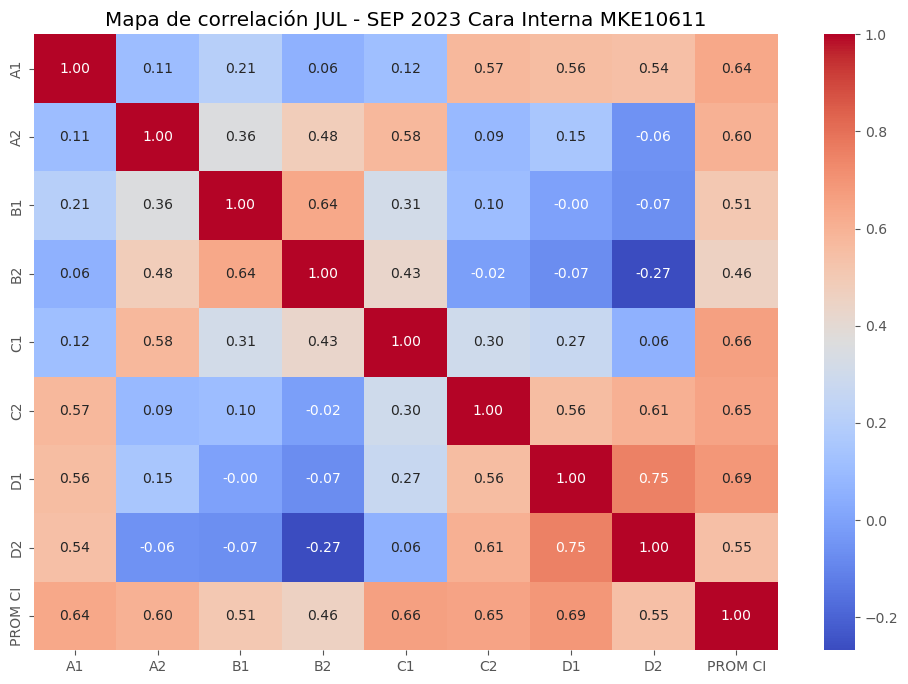

In [67]:
plt.figure(figsize = (12,8))
correlation_matrix = df_ci_611.corr(numeric_only = True)
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = "coolwarm") #en este caso no es necesario eliminar columnas del df
plt.title("Mapa de correlación JUL - SEP 2023 Cara Interna MKE10611")

Los puntos mas relacionados al promedio de la cara interna en este modelo son D1, C1, C2, A1.

Promedio cara interna de modelo MKE10611 en los ultimos meses

Text(0.5, 1.0, 'Promedio MKE10611 CE Jul-Oct 2023')

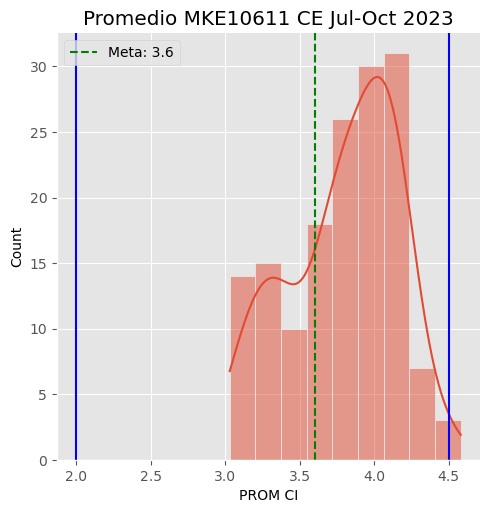

In [68]:
sns.displot(x = df_ci_611["PROM CI"], kde = True)
plt.axvline(x=2, color='blue', linestyle='-')
plt.axvline(x=4.5, color='blue', linestyle='-')
plt.axvline(x=3.6, color='green', linestyle='--', label=f"Meta: 3.6")
#plt.axvline(x = np.mean(df_reciente["PROM FRAME"]), color = "yellow",
 #                       label=f'Media: {np.mean(df_reciente["PROM FRAME"]):.2f}')

#plt.axvline(x = np.median(df_reciente["PROM FRAME"]), color = "black", linestyle = "--",
       #                label=f'Mediana = {np.median(df_reciente["PROM FRAME"]):.2f}')
#plt.axvline(x = moda, color = "yellow", linestyle="-", label = f"Moda: {moda[0]:.2f}")
plt.legend()
plt.title("Promedio MKE10611 CE Jul-Oct 2023")

# 6.- Resultados

Observemos que existen algunas áreas que están fuera de los límites de espeficicación, analicemos cuáles son

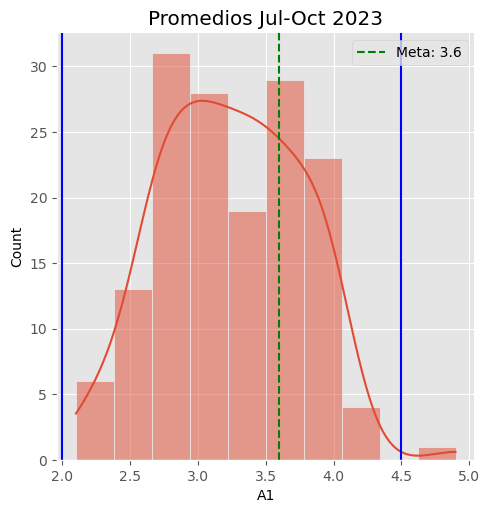

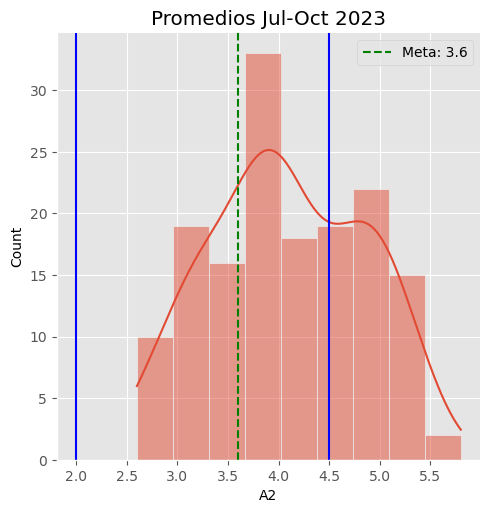

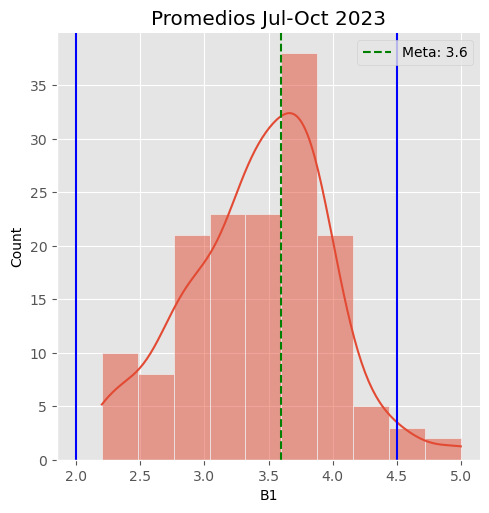

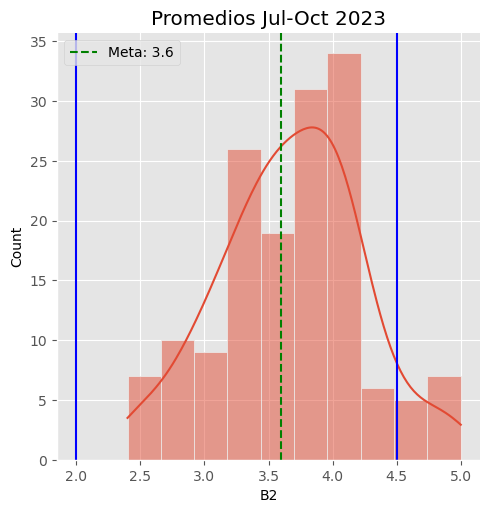

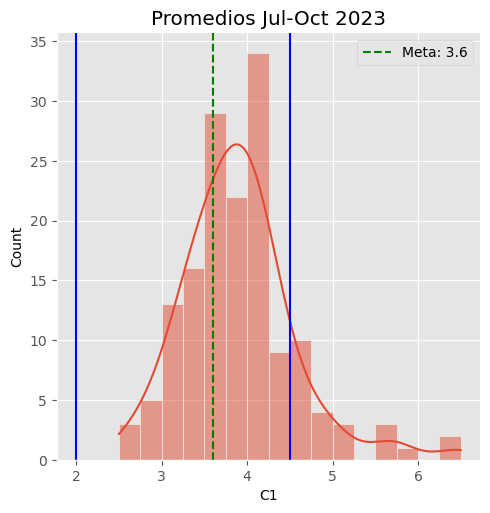

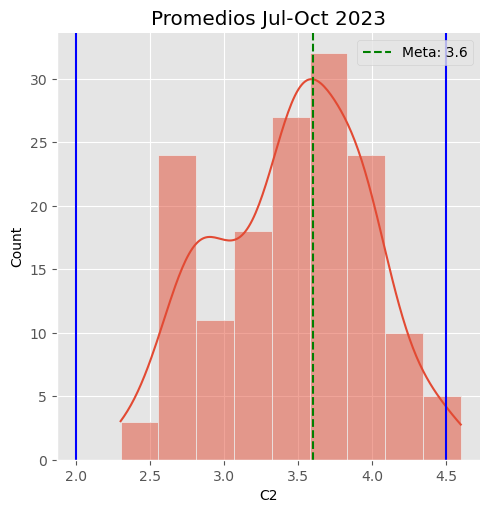

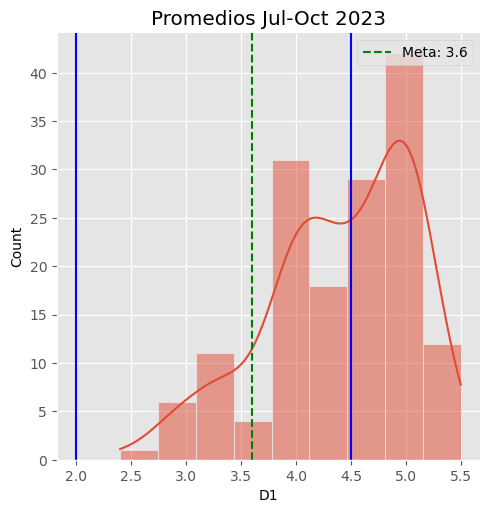

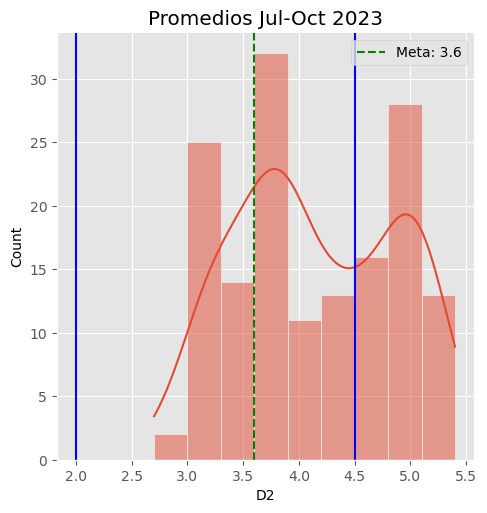

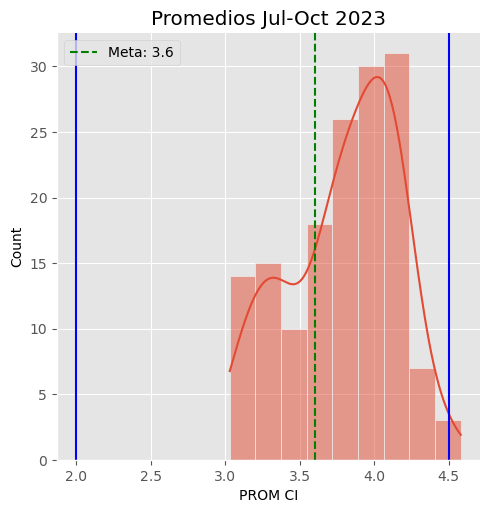

In [69]:
puntos = ["A1","A2","B1","B2","C1","C2","D1","D2", "PROM CI"]
for i in puntos:
    sns.displot(x = df_ci_611[i], kde = True)
    plt.axvline(x=2, color='blue', linestyle='-')
    plt.axvline(x=4.5, color='blue', linestyle='-')
    plt.axvline(x=3.6, color='green', linestyle='--', label=f"Meta: 3.6")
            #plt.axvline(x = np.mean(df_reciente["PROM FRAME"]), color = "yellow",
             #                       label=f'Media: {np.mean(df_reciente["PROM FRAME"]):.2f}')

            #plt.axvline(x = np.median(df_reciente["PROM FRAME"]), color = "black", linestyle = "--",
                   #                label=f'Mediana = {np.median(df_reciente["PROM FRAME"]):.2f}')
            #plt.axvline(x = moda, color = "yellow", linestyle="-", label = f"Moda: {moda[0]:.2f}")
    plt.legend()
    plt.title("Promedios Jul-Oct 2023")

# Los puntos más críticos son: A2, C1, D2, D1

En base a este hallazgo, la empresa puede empezar a realizar un plan de acción para corregir estos altos espesores.

*Por seguridad de la empresa no he incluido el nombre ni imágenes relacionadas con las compuertas en este notebook.